## **IT402 : Applied Forecasting Methods**

**Group : 23**


*   Vrund Leuva (202201199)

*   Zeel Boghara (202201201)

*   Meshv Patel (202201479)




*   **Overview** : The Food Price Index (FPI) dataset, spanning 1990–2023 and recorded daily, captures global food commodity price movements. It reflects long-term trends, seasonal patterns, and abrupt shifts due to events like conflicts or pandemics. Key challenges include handling nonlinearity, seasonality, and sudden market disruptions. This data is vital for analyzing food market dynamics and informing policy decisions.






# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.api.types import CategoricalDtype
import holidays
from sklearn.linear_model import LinearRegression
from datetime import datetime
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis**

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1aHtB_mL5pjVz8Ryu8GKyjw5gkn7PQhhZWgZU6wuGrwc/export?format=csv')
df.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,1990-01,64.4,74.3,53.5,64.1,44.59,87.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02,64.7,76.8,52.2,62.2,44.50,90.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03,64.0,78.5,41.4,61.3,45.75,95.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04,66.0,81.2,48.4,62.8,44.02,94.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05,64.6,81.8,39.2,62.0,45.50,90.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop Redundant Columns & reorder columns

In [ ]:
# Get a list of columns to drop, but only if they exist in the DataFrame
columns_to_drop = [f'Unnamed: {i}' for i in range(7, 66) if f'Unnamed: {i}' in df.columns]

# Drop the columns (if any)
if columns_to_drop:  # Only drop if columns_to_drop is not empty
    df = df.drop(columns=columns_to_drop)
else:
    print("No columns to drop.")

In [ ]:
# # Get a list of columns to drop
# columns_to_drop = ['Meat','Dairy','Cereals','Oils','Sugar']  # Range 7-65 inclusive

# # Drop the columns
# df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
0,1990-01,64.4,74.3,53.5,64.1,44.59,87.9
1,1990-02,64.7,76.8,52.2,62.2,44.50,90.7
2,1990-03,64.0,78.5,41.4,61.3,45.75,95.1
3,1990-04,66.0,81.2,48.4,62.8,44.02,94.3
4,1990-05,64.6,81.8,39.2,62.0,45.50,90.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              423 non-null    object 
 1   Food Price Index  423 non-null    float64
 2   Meat              423 non-null    float64
 3   Dairy             423 non-null    float64
 4   Cereals           423 non-null    float64
 5   Oils              423 non-null    float64
 6   Sugar             423 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.3+ KB


In [ ]:
df.describe()

,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,88.298582,86.645154,87.449882,89.263357,92.236501,84.582270
std,26.922958,17.855590,34.276142,31.838610,39.054566,32.974861
min,50.800000,52.300000,36.800000,48.600000,35.830000,31.800000
25%,64.550000,72.850000,56.750000,60.550000,63.665000,59.800000
50%,86.100000,84.500000,80.400000,87.300000,82.760000,77.700000
75%,113.800000,100.600000,114.750000,112.150000,117.235000,108.400000
max,160.200000,125.400000,158.200000,173.500000,251.800000,183.200000


In [ ]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])  # Ensure it's in datetime format
df.set_index('Date', inplace=True)  # Set it back as the index


In [ ]:
df

,index,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
Date,,,,,,,
1990-01-01,0,64.4,74.3,53.5,64.1,44.59,87.9
1990-02-01,1,64.7,76.8,52.2,62.2,44.50,90.7
1990-03-01,2,64.0,78.5,41.4,61.3,45.75,95.1
1990-04-01,3,66.0,81.2,48.4,62.8,44.02,94.3
1990-05-01,4,64.6,81.8,39.2,62.0,45.50,90.4
...,...,...,...,...,...,...,...
2024-11-01,418,127.7,118.7,140.0,111.4,164.10,126.4
2024-12-01,419,127.4,119.6,141.9,111.4,162.10,119.3
2025-01-01,420,124.7,116.7,143.4,111.8,153.00,111.2


In [ ]:
df.shape

(423, 7)

In [ ]:
df.isnull().sum()

,0
index,0
Food Price Index,0
Meat,0
Dairy,0
Cereals,0
Oils,0
Sugar,0


In [ ]:
# check for missing values and fill them if there
if(df.isnull().sum().sum()==0):
    print('No missing values.')
else:
    df.fillna(method='ffill',inplace=True)

No missing values.


In [ ]:
cat_type = CategoricalDtype(categories=['Monday','Tuesday','Wednesday',
                                        'Thursday','Friday','Saturday','Sunday'],
                            ordered=True)
us_holidays = holidays.US(years=[2015, 2016, 2017])

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['isholiday'] = df['date'].dt.normalize().isin(us_holidays)
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300],
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','isholiday','weekday','month','year','season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='Food Price Index')
features_and_target = pd.concat([X, y], axis=1)

# Display the first few rows to verify
print(features_and_target[features_and_target['isholiday'] == True])

            hour  isholiday   weekday  month  year  season  Food Price Index
Date                                                                        
2015-01-01     0       True  Thursday      1  2015  Winter             101.0
2016-01-01     0       True    Friday      1  2016  Winter              84.9
2017-01-01     0       True    Sunday      1  2017  Winter              97.8


In [ ]:
df.rename(columns={'Food Price Index': 'FPI'}, inplace=True)
df

,index,FPI,Meat,Dairy,Cereals,Oils,Sugar
Date,,,,,,,
1990-01-01,0,64.4,74.3,53.5,64.1,44.59,87.9
1990-02-01,1,64.7,76.8,52.2,62.2,44.50,90.7
1990-03-01,2,64.0,78.5,41.4,61.3,45.75,95.1
1990-04-01,3,66.0,81.2,48.4,62.8,44.02,94.3
1990-05-01,4,64.6,81.8,39.2,62.0,45.50,90.4
...,...,...,...,...,...,...,...
2024-11-01,418,127.7,118.7,140.0,111.4,164.10,126.4
2024-12-01,419,127.4,119.6,141.9,111.4,162.10,119.3
2025-01-01,420,124.7,116.7,143.4,111.8,153.00,111.2


## Data Visualization

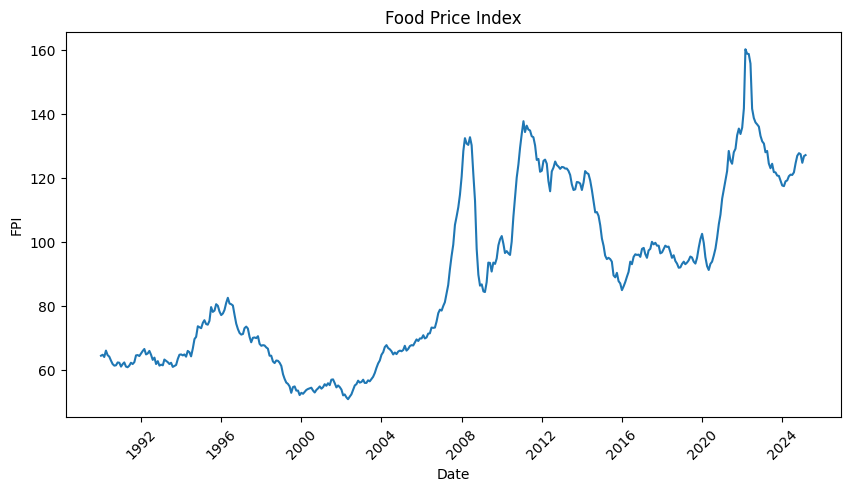

In [ ]:
# For better readability, resample the data by day and take the mean
plt.figure(figsize=(10, 5))
# df_daily = df.resample('D').mean()
plt.plot(df.index, df['FPI'])
plt.title('Food Price Index')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('FPI')
plt.show()
df_daily=df

In [ ]:
df_daily

,index,FPI,Meat,Dairy,Cereals,Oils,Sugar
Date,,,,,,,
1990-01-01,0,64.4,74.3,53.5,64.1,44.59,87.9
1990-02-01,1,64.7,76.8,52.2,62.2,44.50,90.7
1990-03-01,2,64.0,78.5,41.4,61.3,45.75,95.1
1990-04-01,3,66.0,81.2,48.4,62.8,44.02,94.3
1990-05-01,4,64.6,81.8,39.2,62.0,45.50,90.4
...,...,...,...,...,...,...,...
2024-11-01,418,127.7,118.7,140.0,111.4,164.10,126.4
2024-12-01,419,127.4,119.6,141.9,111.4,162.10,119.3
2025-01-01,420,124.7,116.7,143.4,111.8,153.00,111.2


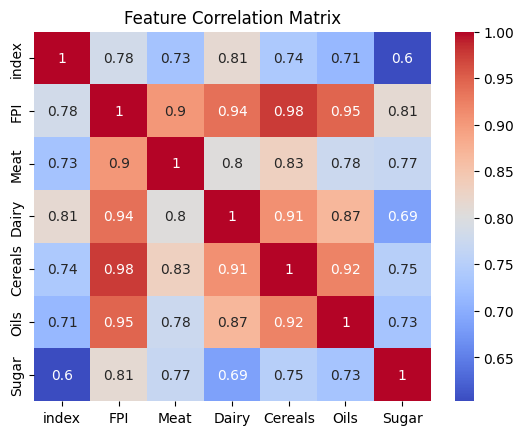

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index to bring 'Date' back as a column
df_daily = df_daily.reset_index()

# Convert 'Date' column to datetime if it's not already
df_daily['Date'] = pd.to_datetime(df_daily['Date'])

# Select only numeric columns for correlation
#NOTE: Since 'df' has 'Date' as an index and 'df_daily' has 'Date' as column, numeric_df MUST use 'df_daily'
numeric_df = df_daily.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
df_daily.shape

(423, 7)

## ADF TEST AND DIFFERENCING

In [ ]:
# Install required libraries if needed (uncomment if necessary)
# !pip install pandas numpy matplotlib statsmodels sklearn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA  # For a pure MA model, p=0, q>0

from sklearn.metrics import mean_squared_error, r2_score
import math

# Optional: nicer plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [ ]:
def adf_test(series, title=''):
    """
    Perform ADF test and print the results.
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic','p-value','# Lags Used','Number of Observations Used']
    out = dict(zip(labels, result[0:4]))
    for key, val in out.items():
        print(f"   {key} : {val}")
    for key,val in result[4].items():
        print(f"   Critical Value {key} : {val}")
    print("")

# Perform ADF test on the 'Close' prices
adf_test(df_daily['FPI'], 'FPI')


Augmented Dickey-Fuller Test: FPI
   ADF Test Statistic : -1.7294332228770004
   p-value : 0.4160149366671122
   # Lags Used : 5
   Number of Observations Used : 417
   Critical Value 1% : -3.446129402876608
   Critical Value 5% : -2.8684960761128346
   Critical Value 10% : -2.570475362616382



In [ ]:
# prompt: take first diff of my Vehicles

# Calculate the first difference of the 'Vehicles' column
df_daily['FPI_diff'] = df_daily['FPI'].diff()

# Print the first few rows to verify
# print(df_daily.head())
# prompt: i got difference so first value of vehicales_scaled_diff gets NaN, handle that value

# Fill the first NaN value in 'Vehicles_diff' with 0
df_daily['FPI_diff'].fillna(0, inplace=True)

# Print the first few rows to verify
print(df_daily.head())


        Date  index   FPI  Meat  Dairy  Cereals   Oils  Sugar  FPI_diff
0 1990-01-01      0  64.4  74.3   53.5     64.1  44.59   87.9       0.0
1 1990-02-01      1  64.7  76.8   52.2     62.2  44.50   90.7       0.3
2 1990-03-01      2  64.0  78.5   41.4     61.3  45.75   95.1      -0.7
3 1990-04-01      3  66.0  81.2   48.4     62.8  44.02   94.3       2.0
4 1990-05-01      4  64.6  81.8   39.2     62.0  45.50   90.4      -1.4


In [ ]:
adf_test(df_daily['FPI_diff'], 'Food Price Index')

Augmented Dickey-Fuller Test: Food Price Index
   ADF Test Statistic : -6.9144233473089365
   p-value : 1.189509738542054e-09
   # Lags Used : 4
   Number of Observations Used : 418
   Critical Value 1% : -3.4460914174990296
   Critical Value 5% : -2.868479374038333
   Critical Value 10% : -2.570466459559076



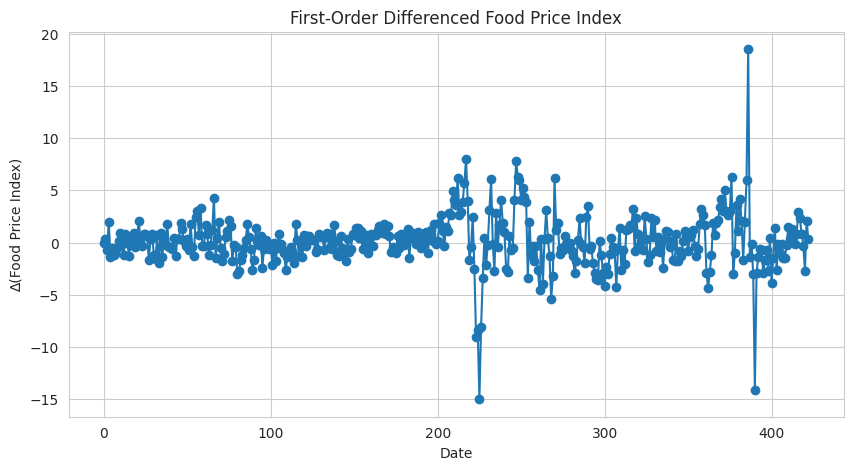

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_daily['FPI_diff'], marker='o', linestyle='-')
plt.title('First‑Order Differenced Food Price Index')
plt.xlabel('Date')
plt.ylabel('∆(Food Price Index)')
plt.grid(True)
plt.show()

## Variance And Mean

In [ ]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []

    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))

    return mean_func

def var_over_time(process: np.array) -> np.array:
    var_func = []

    for i in range(len(process)):
        var_func.append(np.var(process[:i]))

    return var_func

In [ ]:
non_stationary_var = var_over_time(df_daily['FPI'])
non_stationary_mean = mean_over_time(df_daily['FPI'])
stationary_var = var_over_time(df_daily['FPI_diff'])
stationary_mean = mean_over_time(df_daily['FPI_diff'])

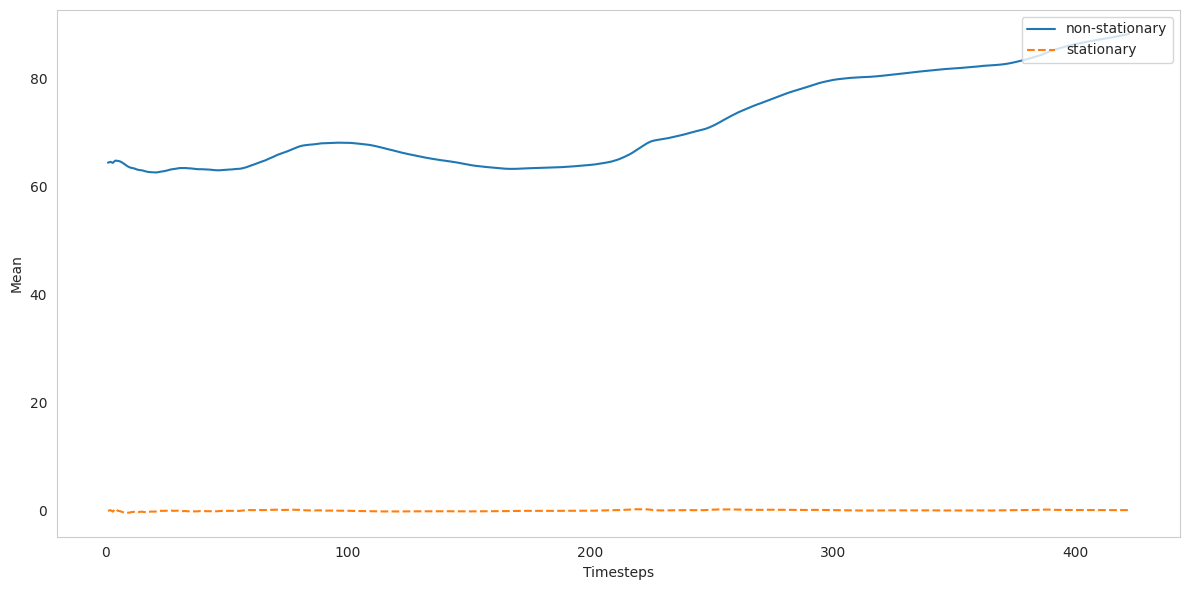

In [ ]:
fig, ax = plt.subplots()

ax.plot(non_stationary_mean, linestyle='-', label='non-stationary')
ax.plot(stationary_mean, linestyle='--', label='stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)
ax.grid(False)  # This explicitly disables the grid

plt.tight_layout()

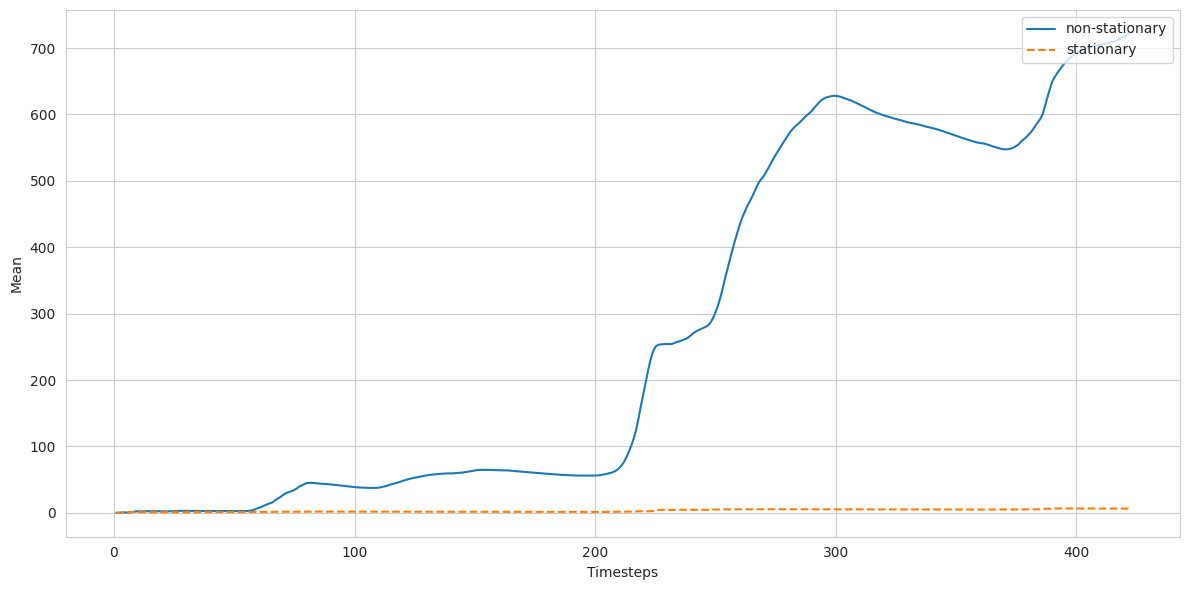

In [ ]:
fig, ax = plt.subplots()

ax.plot(non_stationary_var, linestyle='-', label='non-stationary')
ax.plot(stationary_var, linestyle='--', label='stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

## ACF AND PACF

<Figure size 800x400 with 0 Axes>

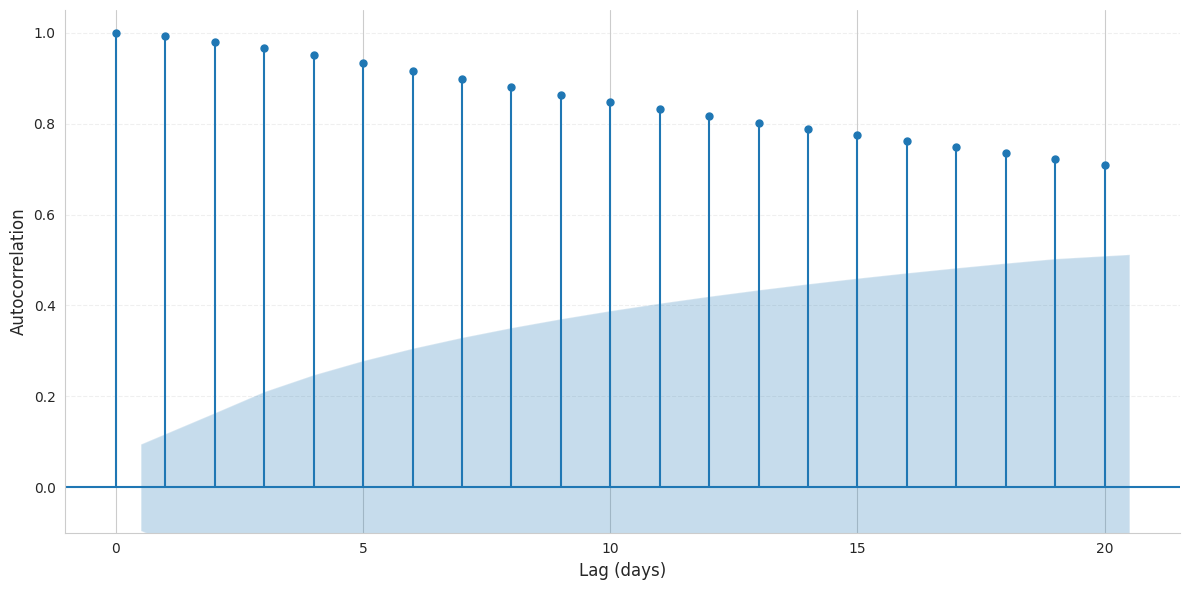

In [ ]:
plt.figure(figsize=(8, 4))  # Wider aspect ratio (2:1)

# Create ACF plot with enhanced styling
plot_acf(df_daily['FPI'], lags=20,
         alpha=0.05,  # 95% confidence interval
         color='#1f77b4',  # Professional blue
         vlines_kwargs={'colors':'#1f77b4'},  # Match bar color
         title='')

# Formatting to match reference image style
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Subtle horizontal grid
plt.xlabel('Lag (days)', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(-0.1, 1.05)  # Match reference scale

plt.tight_layout()
plt.savefig('acf_plot.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 800x400 with 0 Axes>

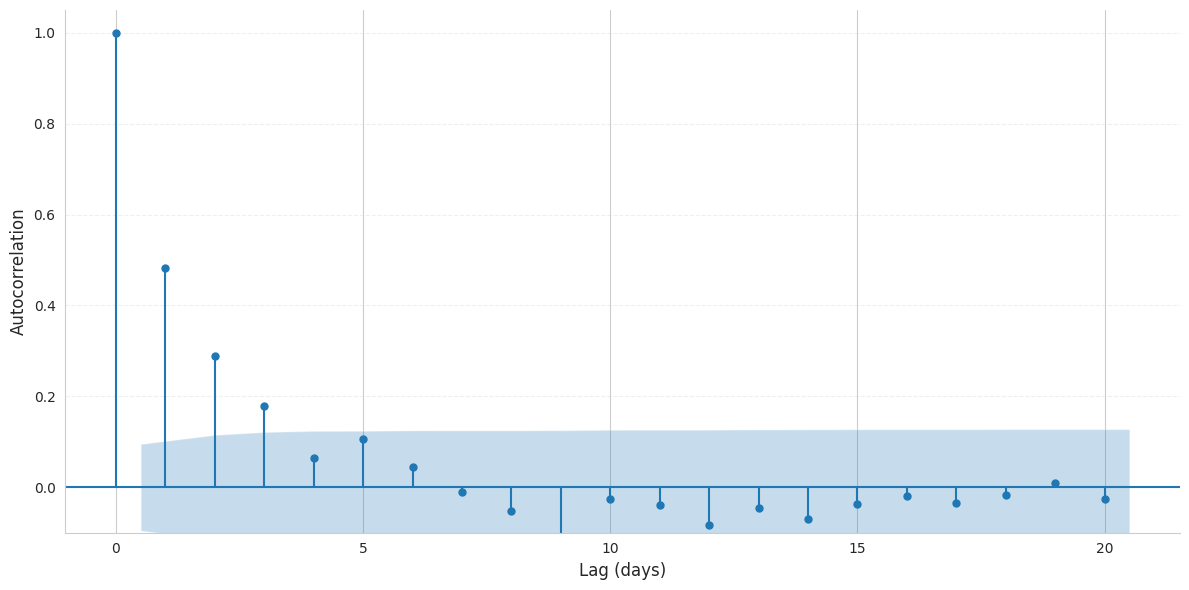

In [ ]:
plt.figure(figsize=(8, 4))  # Wider aspect ratio (2:1)

# Create ACF plot with enhanced styling
plot_acf(df_daily['FPI_diff'], lags=20,
         alpha=0.05,  # 95% confidence interval
         color='#1f77b4',  # Professional blue
         vlines_kwargs={'colors':'#1f77b4'},  # Match bar color
         title='')

# Formatting to match reference image style
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Subtle horizontal grid
plt.xlabel('Lag (days)', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(-0.1, 1.05)  # Match reference scale

plt.tight_layout()
plt.savefig('acf_plot.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 800x400 with 0 Axes>

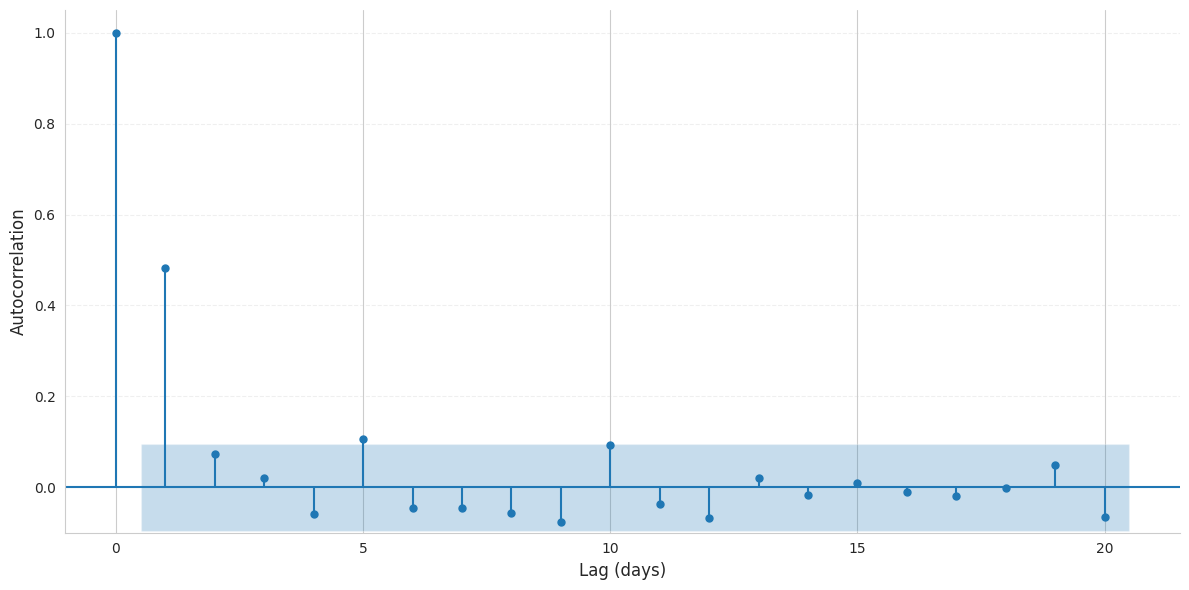

In [ ]:
plt.figure(figsize=(8, 4))  # Wider aspect ratio (2:1)

# Create ACF plot with enhanced styling
plot_pacf(df_daily['FPI_diff'], lags=20,
         alpha=0.05,  # 95% confidence interval
         color='#1f77b4',  # Professional blue
         vlines_kwargs={'colors':'#1f77b4'},  # Match bar color
         title='')

# Formatting to match reference image style
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Subtle horizontal grid
plt.xlabel('Lag (days)', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(-0.1, 1.05)  # Match reference scale

plt.tight_layout()
plt.savefig('acf_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Decomposition

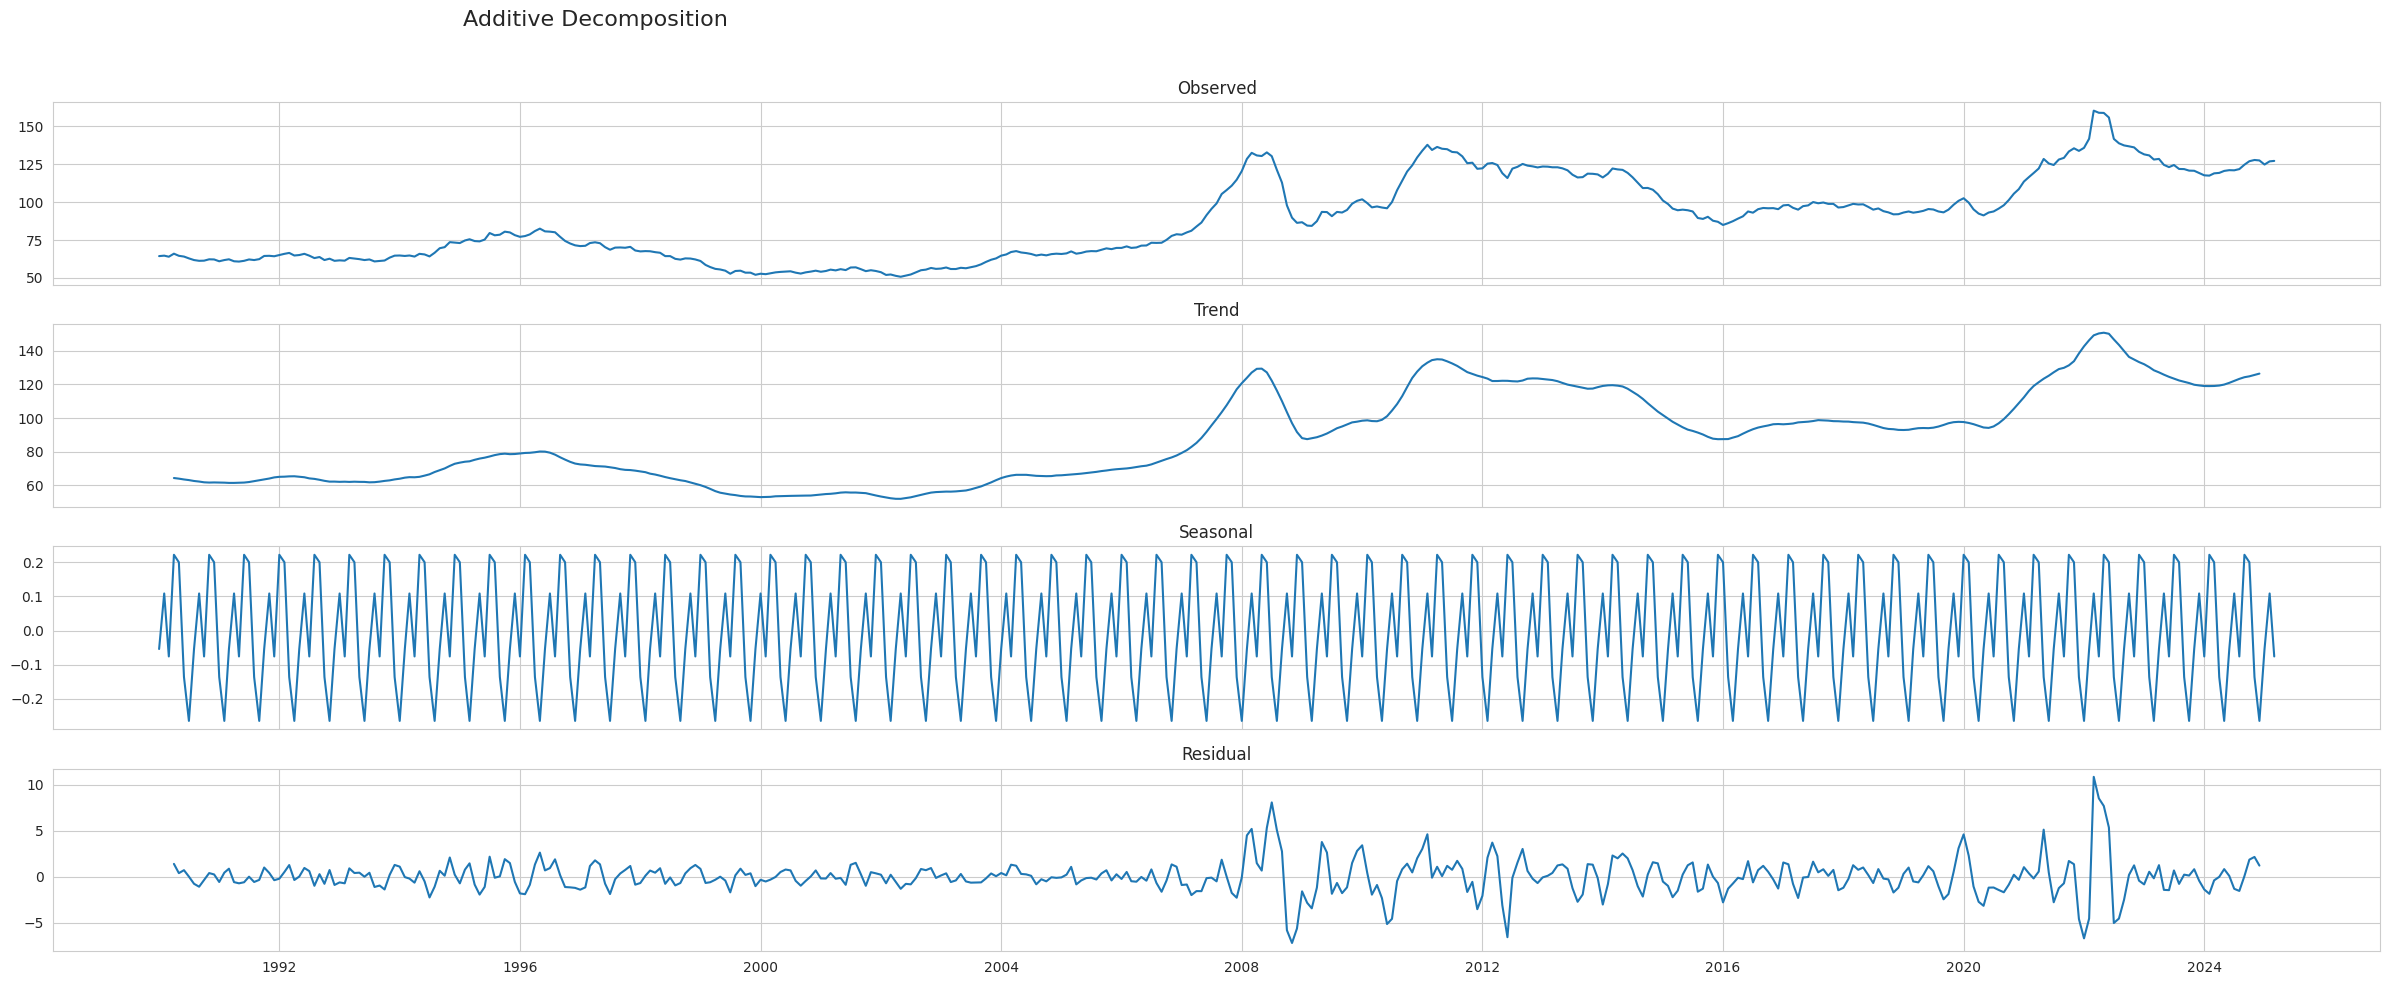

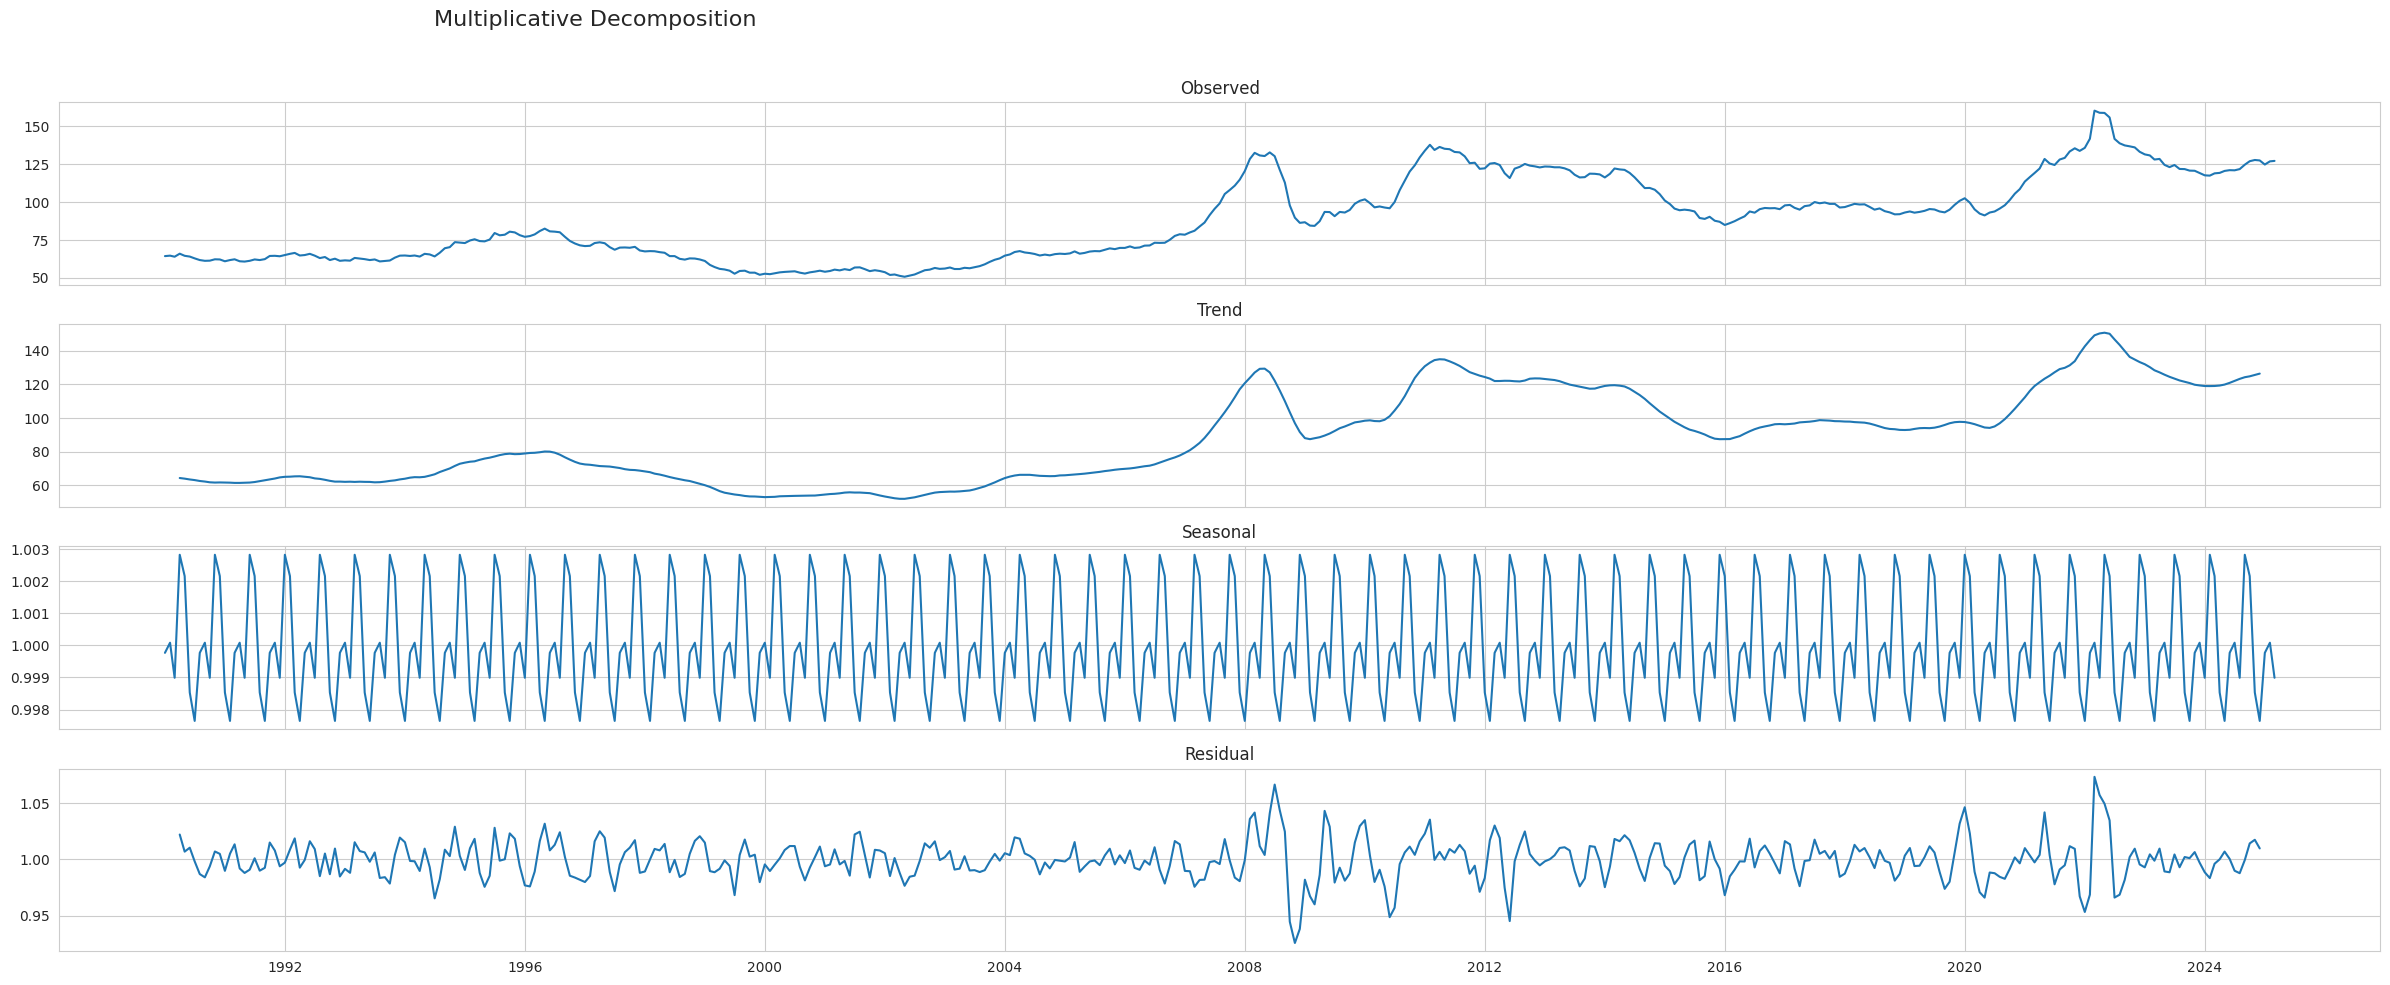

In [ ]:
# Improved Additive Decomposition Plot
result_add = seasonal_decompose(df_daily['FPI'], model='additive', period=7)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(result_add.observed)
axes[0].set_title('Observed')

axes[1].plot(result_add.trend)
axes[1].set_title('Trend')

axes[2].plot(result_add.seasonal)
axes[2].set_title('Seasonal')

axes[3].plot(result_add.resid)
axes[3].set_title('Residual')

fig.suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0, 2, 0.96])
plt.show()


# df_daily['FPI_positive'] = df_daily['FPI'].where(df_daily['FPI'] > 0, 1e-6)
# Improved Multiplicative Decomposition Plot
result_mult = seasonal_decompose(df_daily['FPI'], model='multiplicative', period=7)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(result_mult.observed)
axes[0].set_title('Observed')

axes[1].plot(result_mult.trend)
axes[1].set_title('Trend')

axes[2].plot(result_mult.seasonal)
axes[2].set_title('Seasonal')

axes[3].plot(result_mult.resid)
axes[3].set_title('Residual')

fig.suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0, 2, 0.96])
plt.show()


## **QQ PLOT**

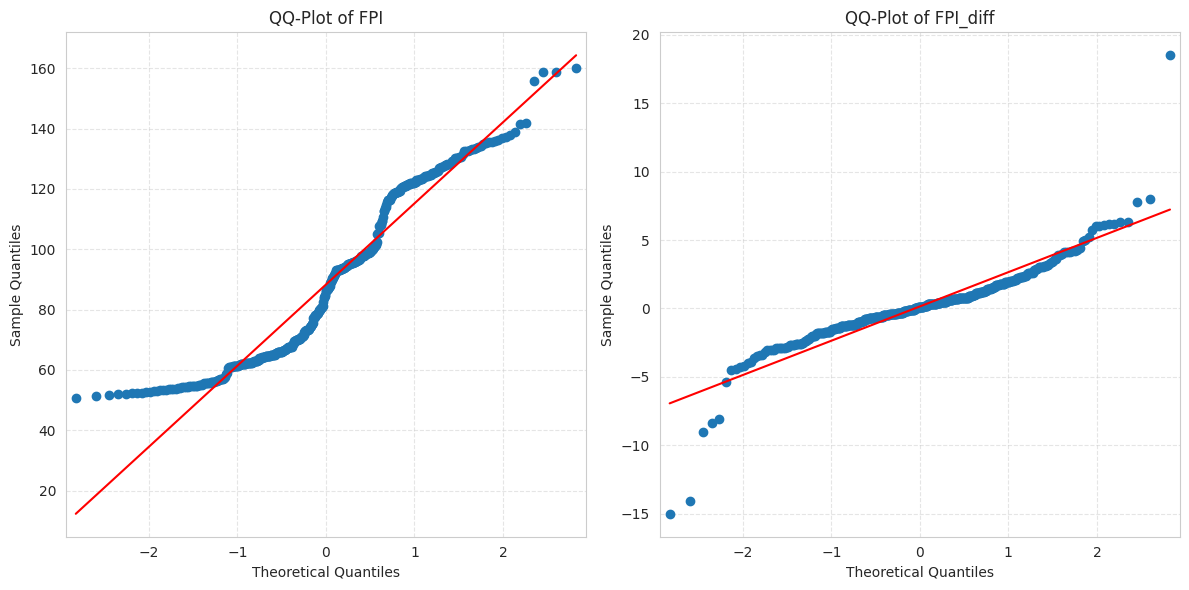

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

# 1. Extract the two series and drop any missing values
series1 = df_daily['FPI'].dropna()
series2 = df_daily['FPI_diff'].dropna()

# 2. Create a 1×2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 3. QQ‑plot for original FPI
qqplot(series1, line='s', ax=axes[0])
axes[0].set_title('QQ‑Plot of FPI')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')
axes[0].grid(True, linestyle='--', alpha=0.5)

# 4. QQ‑plot for differenced FPI
qqplot(series2, line='s', ax=axes[1])
axes[1].set_title('QQ‑Plot of FPI_diff')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')
axes[1].grid(True, linestyle='--', alpha=0.5)

# 5. Layout adjustment & show
plt.tight_layout()
plt.show()

# **ARIMA MODEL**

In [ ]:
# 2. Choose column
column_name = 'FPI'  # change to 'FPI' or others
data = df_daily[column_name]
# 3. Split train/test
split = int(len(data) * 0.9)
train_data = data[:split]
test_data = data[split:]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')
import itertools

🔍 AIC values for ARIMA(p,1,q):

ARIMA(0, 1, 0) - AIC: 1699.00
ARIMA(0, 1, 1) - AIC: 1600.55
ARIMA(0, 1, 2) - AIC: 1578.59
ARIMA(0, 1, 3) - AIC: 1573.72
ARIMA(0, 1, 4) - AIC: 1571.87
ARIMA(0, 1, 5) - AIC: 1569.45
ARIMA(0, 1, 6) - AIC: 1566.70
ARIMA(0, 1, 7) - AIC: 1568.18
ARIMA(0, 1, 8) - AIC: 1569.07
ARIMA(0, 1, 9) - AIC: 1570.86
ARIMA(0, 1, 10) - AIC: 1570.73
ARIMA(0, 1, 11) - AIC: 1570.70
ARIMA(0, 1, 12) - AIC: 1572.52
ARIMA(0, 1, 13) - AIC: 1571.31
ARIMA(0, 1, 14) - AIC: 1572.54
ARIMA(1, 1, 0) - AIC: 1563.72
ARIMA(1, 1, 1) - AIC: 1563.79
ARIMA(1, 1, 2) - AIC: 1565.18
ARIMA(1, 1, 3) - AIC: 1567.15
ARIMA(1, 1, 4) - AIC: 1568.15
ARIMA(1, 1, 5) - AIC: 1568.59
ARIMA(1, 1, 6) - AIC: 1567.67
ARIMA(1, 1, 7) - AIC: 1569.06
ARIMA(1, 1, 8) - AIC: 1571.03
ARIMA(1, 1, 9) - AIC: 1570.94
ARIMA(1, 1, 10) - AIC: 1574.09
ARIMA(1, 1, 11) - AIC: 1573.94
ARIMA(1, 1, 12) - AIC: 1572.27
ARIMA(1, 1, 13) - AIC: 1570.89
ARIMA(1, 1, 14) - AIC: 1572.88
ARIMA(2, 1, 0) - AIC: 1564.12
ARIMA(2, 1, 1) - AIC: 1565.3

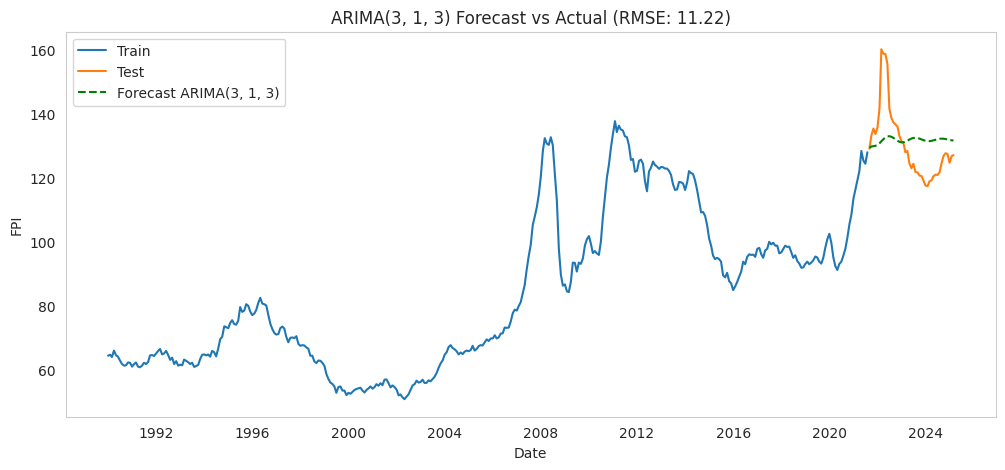

In [ ]:
# 2. Choose column
column_name = 'FPI'  # change to 'FPI' or others
data = df[column_name]

# 3. Split train/test
split = int(len(data) * 0.9)
train_data = data[:split]
test_data = data[split:]

# 4. ARIMA search
p_values = range(0, 15)
q_values = range(0, 15)

best_aic = np.inf
best_order = None
best_model = None

print("🔍 AIC values for ARIMA(p,1,q):\n")

# Loop through all (p,q) combinations
for p, q in itertools.product(p_values, q_values):
    try:
        model = ARIMA(train_data, order=(p, 1, q))
        result = model.fit()
        aic = result.aic
        print(f"ARIMA({p}, 1, {q}) - AIC: {aic:.2f}")
        if aic < best_aic:
            best_aic = aic
            best_order = (p, 1, q)
            best_model = result
    except Exception as e:
        print(f"ARIMA({p}, 1, {q}) failed: {e}")

# Show best model
print(f"\n✅ Best ARIMA order: {best_order} with lowest AIC: {best_aic:.2f}")

# Predict and evaluate
forecast = best_model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
rmse = math.sqrt(mean_squared_error(test_data, forecast))
print(f"📉 RMSE on test data: {rmse:.2f}")

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label=f'Forecast ARIMA{best_order}', linestyle='--', color='green')
plt.title(f'ARIMA{best_order} Forecast vs Actual (RMSE: {rmse:.2f})')
plt.xlabel('Date')
plt.ylabel(column_name)
plt.legend()
plt.grid()
plt.show()
# (p,d,q)=(3,1,3)

Best Model: ARMA(3, 3) - AIC: 1559.4318640932715
RMSE: 11.218879368645371


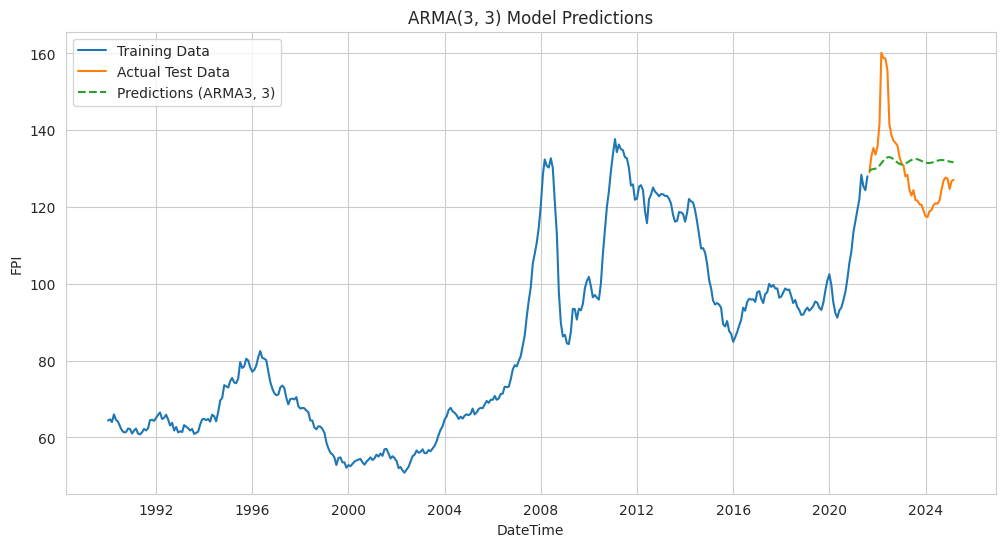

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set the best (p, q) combination directly
p, q = 3, 3  # Best model: ARMA(7, 10)

# Fit ARIMA model (ARMA with d=0) with the best p, q values
model = ARIMA(train_data, order=(p, 1, q))
results = model.fit()

# Print the AIC value
print(f"Best Model: ARIMA({p}, {q}) - AIC: {results.aic}")

# Make predictions with the best model
predictions = results.predict(start=len(train_data), end=len(df_daily) - 1)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, predictions, label=f'Predictions (ARMA{p}, {q})', linestyle='dashed')
plt.xlabel('DateTime')
plt.ylabel('FPI')
plt.title(f'ARIMA({p}, {q}) Model Predictions')
plt.legend()
plt.show()

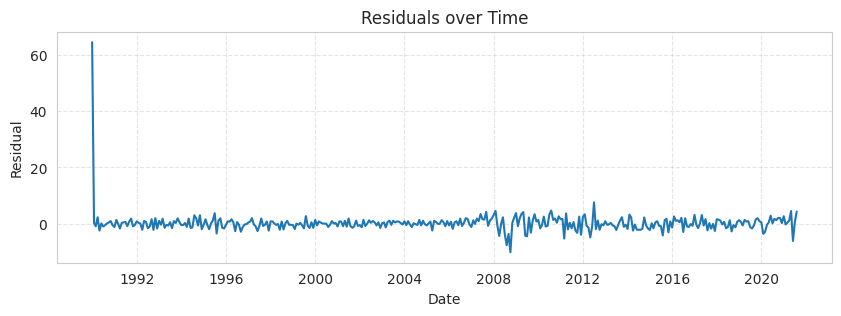

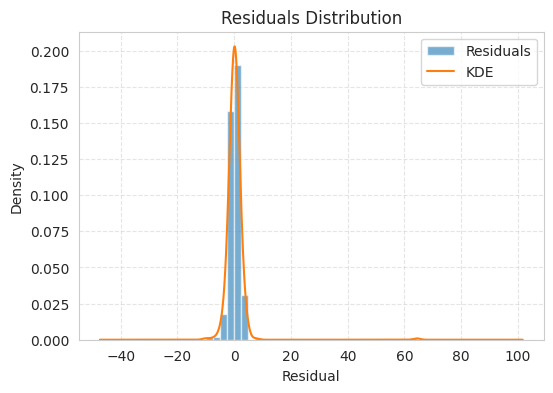

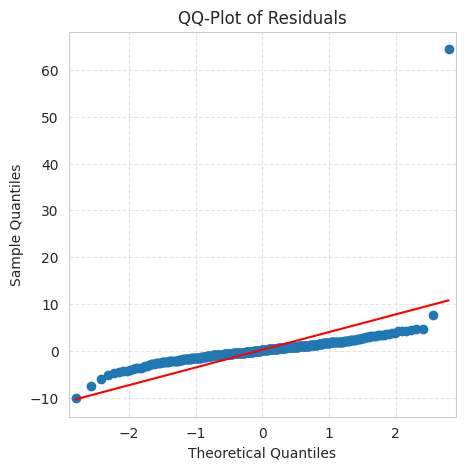

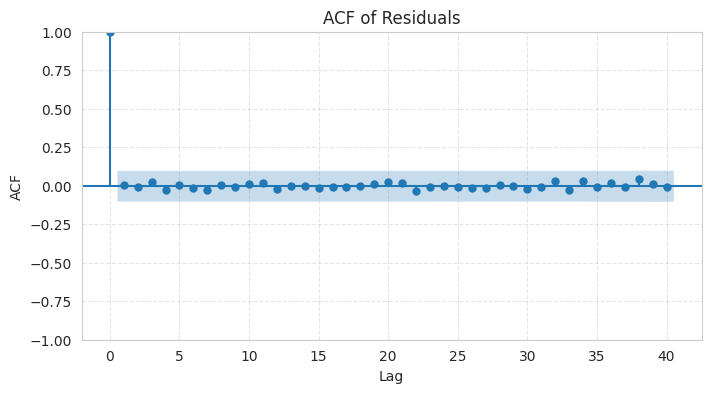

Ljung‑Box test results:
     lb_stat  lb_pvalue
10  1.116817   0.999715
20  1.896648   1.000000


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1. Extract residuals
resid = results.resid.dropna()

# 2. Plot residuals over time
plt.figure(figsize=(10,3))
plt.plot(resid)
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3. Histogram + KDE of residuals
plt.figure(figsize=(6,4))
resid.plot(kind='hist', bins=30, density=True, alpha=0.6, label='Residuals')
resid.plot(kind='kde', label='KDE')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4. QQ‑plot for normality
plt.figure(figsize=(5,5))
qqplot(resid, line='s', ax=plt.gca())
plt.title('QQ‑Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 5. Autocorrelation Function (ACF) of residuals
plt.figure(figsize=(8,4))
plot_acf(resid, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 6. Ljung‑Box test for no remaining autocorrelation
#    we test at lags 10 and 20 (you can customize)
lb = acorr_ljungbox(resid, lags=[10, 20], return_df=True)
print("Ljung‑Box test results:")
print(lb)

# **SARIMA MODEL**

In [ ]:
!pip install statsmodels scikit-learn


In [ ]:
# === Train/test split ===
train_data = df_daily[:-int(len(df_daily) * 0.2)]
test_data = df_daily[-int(len(df_daily) * 0.2):]

In [ ]:
import pandas as pd
import numpy as np
import itertools
import random
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Trying SARIMA(6, 1, 1)x(5, 1, 6, 7) - RMSE: 20.45
Trying SARIMA(1, 1, 0)x(8, 1, 9, 7) - RMSE: 20.51
Trying SARIMA(0, 1, 1)x(12, 1, 4, 7) - RMSE: 19.53
Trying SARIMA(9, 1, 3)x(0, 1, 13, 7) - RMSE: 77165283350852.23
Trying SARIMA(2, 1, 4)x(14, 1, 6, 7) - RMSE: 19.15
Trying SARIMA(2, 1, 2)x(11, 1, 7, 7) - RMSE: 21.29
Trying SARIMA(2, 1, 1)x(2, 1, 12, 7) - RMSE: 149055968486387.06
Trying SARIMA(1, 1, 2)x(9, 1, 6, 7) - RMSE: 20.48
Error with SARIMA(8, 1, 5)x(0, 1, 13, 7): Input contains NaN.
Trying SARIMA(0, 1, 13)x(14, 1, 0, 7) - RMSE: 31.94
Trying SARIMA(6, 1, 4)x(1, 1, 2, 7) - RMSE: 19.54
Trying SARIMA(9, 1, 2)x(0, 1, 14, 7) - RMSE: 2610061504020.46
Trying SARIMA(5, 1, 2)x(0, 1, 10, 7) - RMSE: 21.31
Trying SARIMA(0, 1, 6)x(4, 1, 14, 7) - RMSE: 20516127898927.68
Trying SARIMA(5, 1, 5)x(4, 1, 14, 7) - RMSE: 210173925353980.28
Trying SARIMA(4, 1, 0)x(8, 1, 12, 7) - RMSE: 985692134893.54
Trying SARIMA(0, 1, 2)x(4, 1, 10, 7) - RMSE: 20.11
Trying SARIMA(0, 1, 2)x(2, 1, 8, 7) - RMSE: 20.93
Tryi

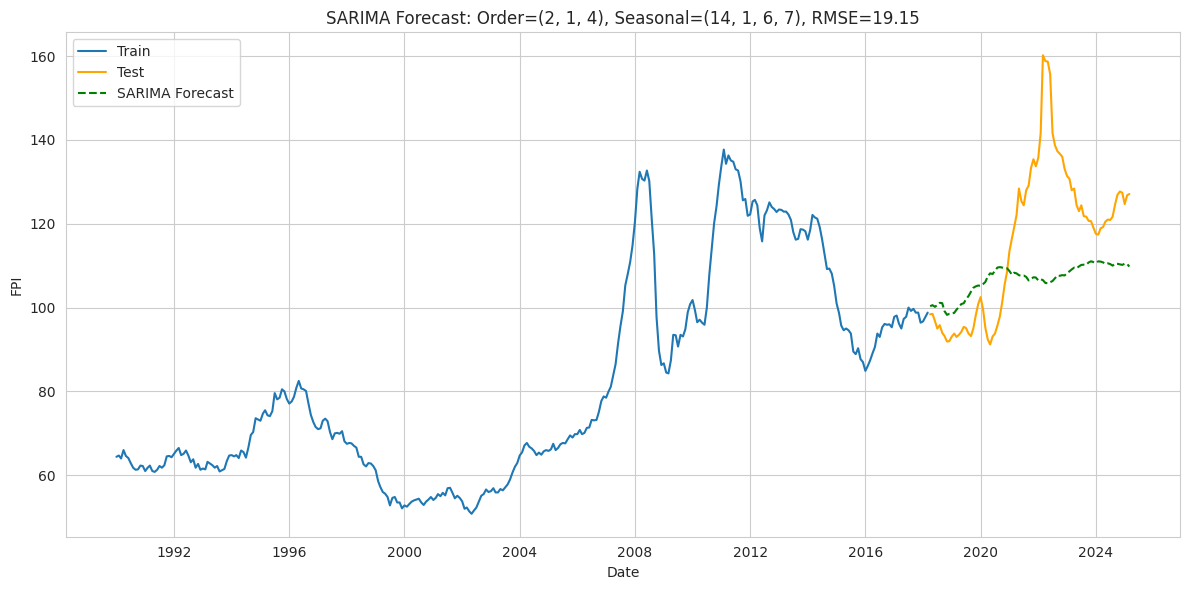

TypeError: can't multiply sequence by non-int of type 'tuple'

In [ ]:
# === Train/test split ===
train_data = df_daily[:-int(len(df_daily) * 0.2)]
test_data = df_daily[-int(len(df_daily) * 0.2):]

# # === Helper: conflict check ===
def has_conflict(order, seasonal_order, s):
    p, d, q = order
    P, D, Q, _ = seasonal_order
    ar_lags = set(range(1, p + 1))
    seasonal_ar_lags = set(P * s for P in range(1, P + 1))
    ma_lags = set(range(1, q + 1))
    seasonal_ma_lags = set(Q * s for Q in range(1, Q + 1))
    return bool(ar_lags & seasonal_ar_lags or ma_lags & seasonal_ma_lags)

# === Parameter grid ===
p = q = range(0, 15)
d = [1]
s = 7  # Weekly seasonality

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in pdq]

# === Filter valid combinations
valid_combinations = [
    (order, seasonal_order)
    for order, seasonal_order in itertools.product(pdq, seasonal_pdq)
    if not has_conflict(order, seasonal_order, s)
]

# === Random sampling to limit computation
random.seed(42)
sampled_combinations = random.sample(valid_combinations, 25)

# === Track best model
best_aic = float('inf')
best_aic_order = None
best_aic_seasonal = None
best_aic_model = None
# === Grid search
for order, seasonal_order in sampled_combinations:
    try:
        model = SARIMAX(train_data['FPI'],
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        # Forecast test period
        pred = results.predict(start=test_data.index[0], end=test_data.index[-1])
        rmse = math.sqrt(mean_squared_error(test_data['FPI'], pred))
        print(f"Trying SARIMA{order}x{seasonal_order} - RMSE: {rmse:.2f}")
        if results.aic < best_aic:
            best_aic = results.aic
            best_aic_model = results
            best_aic_order = order
            best_aic_seasonal = seasonal_order
    except Exception as e:
        print(f"Error with SARIMA{order}x{seasonal_order}: {e}")
        continue

 # === Forecast using best model
forecast = best_aic_model.predict(start=test_data.index[0], end=test_data.index[-1])
# === Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['FPI'], label='Train')
plt.plot(test_data.index, test_data['FPI'], label='Test', color='orange')
plt.plot(test_data.index, forecast, label='SARIMA Forecast', linestyle='--', color='green')
plt.title(f"SARIMA Forecast: Order={best_aic_order}, Seasonal={best_aic_seasonal}, RMSE={best_aic:.2f}")
plt.xlabel("Date")
plt.ylabel("FPI")
plt.legend()
plt.tight_layout()
plt.show()
 # (2,1,4)*(14,1,6,7)

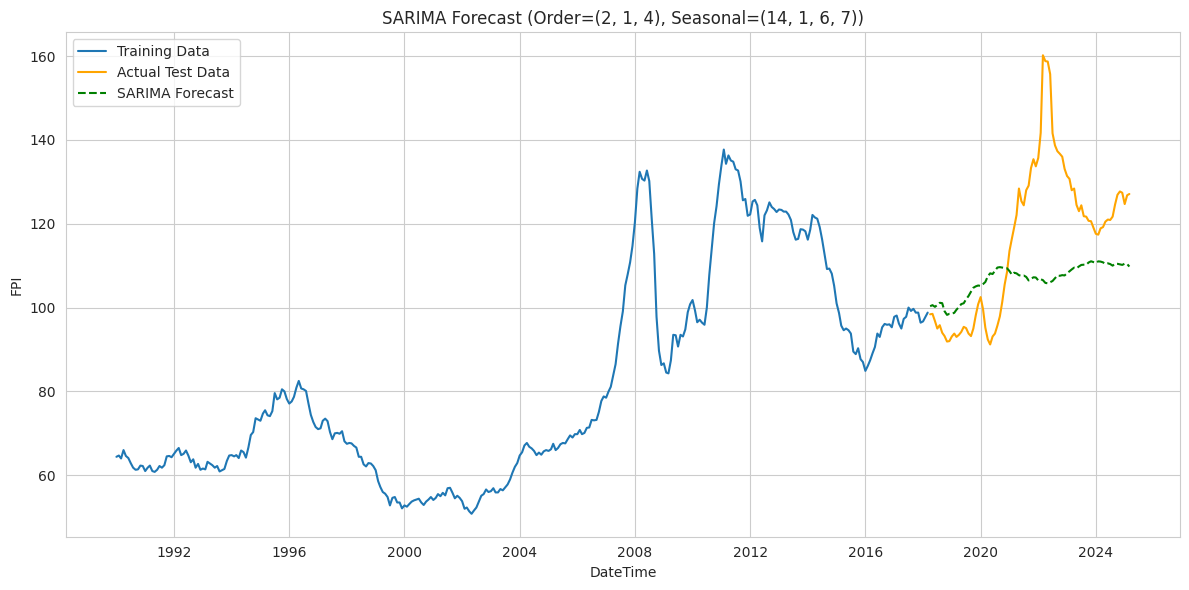

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Replace with the best values you found
best_order = (2, 1, 4)               # e.g., (2, 1, 2)
best_seasonal_order = (14, 1, 6, 7)   # e.g., (1, 1, 1, 7)

# Fit model on training data
model = SARIMAX(train_data['FPI'],
                order=best_order,
                seasonal_order=best_seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Forecast on test data
forecast = results.predict(start=test_data.index[0],
                           end=test_data.index[-1])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['FPI'], label='Training Data')
plt.plot(test_data.index, test_data['FPI'], label='Actual Test Data', color='orange')
plt.plot(test_data.index, forecast, label='SARIMA Forecast', linestyle='--', color='green')
plt.xlabel('DateTime')
plt.ylabel('FPI')
plt.title(f'SARIMA Forecast (Order={best_order}, Seasonal={best_seasonal_order})')
plt.legend()
plt.tight_layout()
plt.show()


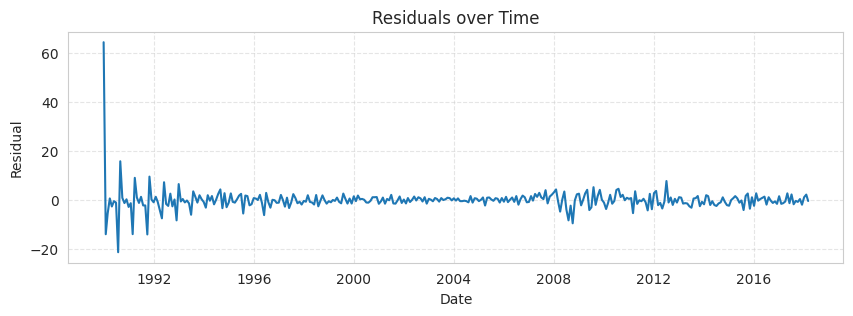

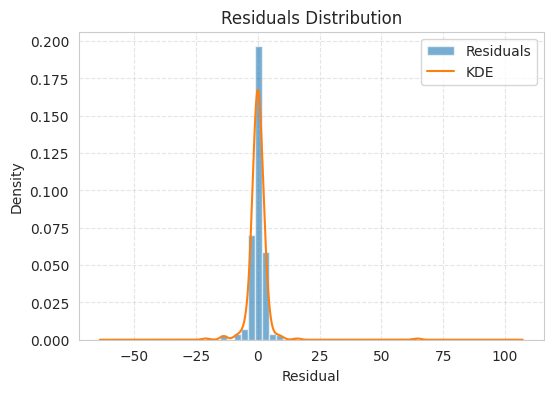

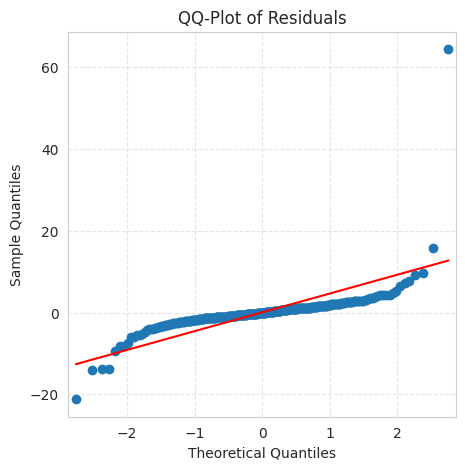

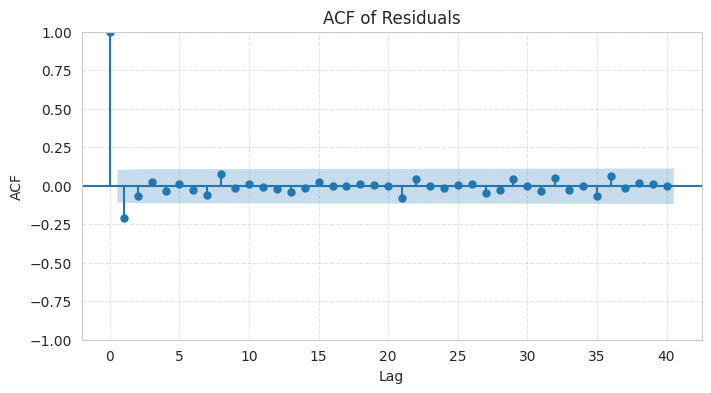

Ljung‑Box test results:
      lb_stat  lb_pvalue
10  21.233801   0.019521
20  22.399883   0.319212


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1. Extract residuals
resid = results.resid.dropna()

# 2. Plot residuals over time
plt.figure(figsize=(10,3))
plt.plot(resid)
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3. Histogram + KDE of residuals
plt.figure(figsize=(6,4))
resid.plot(kind='hist', bins=30, density=True, alpha=0.6, label='Residuals')
resid.plot(kind='kde', label='KDE')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4. QQ‑plot for normality
plt.figure(figsize=(5,5))
qqplot(resid, line='s', ax=plt.gca())
plt.title('QQ‑Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 5. Autocorrelation Function (ACF) of residuals
plt.figure(figsize=(8,4))
plot_acf(resid, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 6. Ljung‑Box test for no remaining autocorrelation
#    we test at lags 10 and 20 (you can customize)
lb = acorr_ljungbox(resid, lags=[10, 20], return_df=True)
print("Ljung‑Box test results:")
print(lb)

AIC: 1038.3847860033536
RMSE: 19.147917591869554


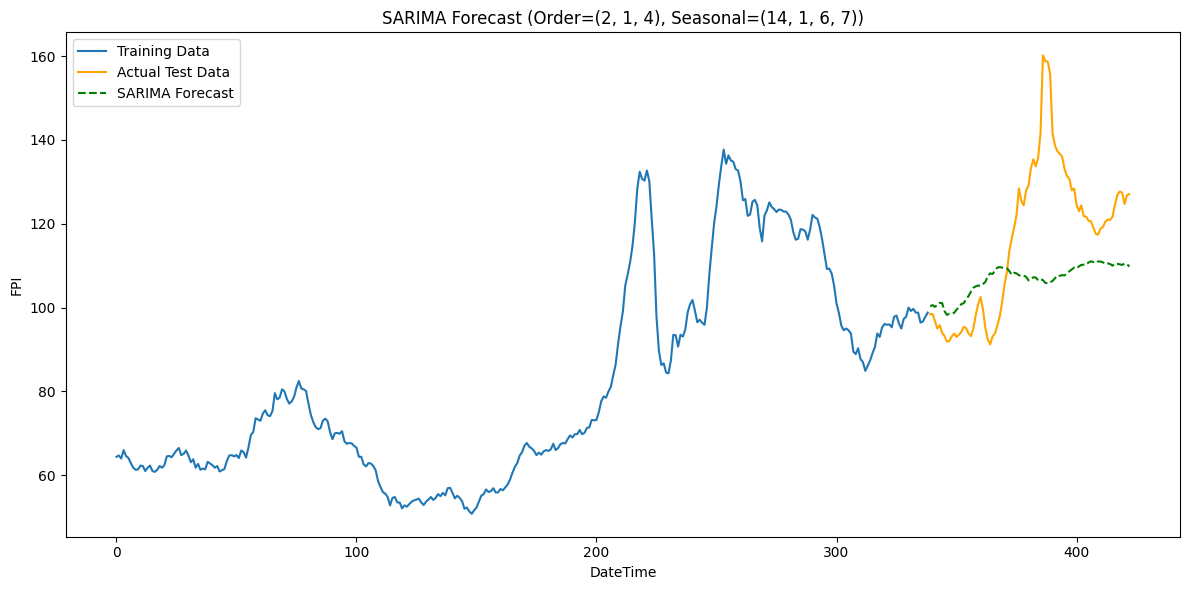

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Replace with the best values you found
best_order = (2, 1, 4)               # e.g., (2, 1, 2)
best_seasonal_order = (14, 1, 6, 7)   # e.g., (1, 1, 1, 7)

# Fit model on training data
model = SARIMAX(train_data['FPI'],
                order=best_order,
                seasonal_order=best_seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Forecast on test data
forecast = results.predict(start=test_data.index[0],
                           end=test_data.index[-1])

# AIC
print("AIC:", results.aic)

# Forecast

# RMSE
rmse = np.sqrt(mean_squared_error(test_data['FPI'], forecast)) # Select 'FPI' column from test_data
print("RMSE:", rmse)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['FPI'], label='Training Data')
plt.plot(test_data.index, test_data['FPI'], label='Actual Test Data', color='orange')
plt.plot(test_data.index, forecast, label='SARIMA Forecast', linestyle='--', color='green')
plt.xlabel('DateTime')
plt.ylabel('FPI')
plt.title(f'SARIMA Forecast (Order={best_order}, Seasonal={best_seasonal_order})')
plt.legend()
plt.tight_layout()
plt.show()


# **SARIMAX MODEL**

In [ ]:

# Drop rows with NaN (from lags)
df_daily.dropna(inplace=True)

# STEP 3: Train-test split (last 30 days as test)
train_size = int(len(df_daily) * 0.9)
train_data = df_daily.iloc[:train_size]
test_data = df_daily.iloc[train_size:]

exog_cols = ['Meat', 'Dairy', 'Cereals', 'Oils','Sugar']
exog_train = train_data[exog_cols]
exog_test = test_data[exog_cols]

df_daily

,Date,FPI,Meat,Dairy,Cereals,Oils,Sugar
0,1990-01,64.4,74.3,53.5,64.1,44.59,87.9
1,1990-02,64.7,76.8,52.2,62.2,44.50,90.7
2,1990-03,64.0,78.5,41.4,61.3,45.75,95.1
3,1990-04,66.0,81.2,48.4,62.8,44.02,94.3
4,1990-05,64.6,81.8,39.2,62.0,45.50,90.4
...,...,...,...,...,...,...,...
418,2024-11,127.7,118.7,140.0,111.4,164.10,126.4
419,2024-12,127.4,119.6,141.9,111.4,162.10,119.3
420,2025-01,124.7,116.7,143.4,111.8,153.00,111.2
421,2025-02,126.8,117.0,148.7,112.6,156.00,118.5


Trying SARIMAX(6, 1, 1)x(5, 1, 6, 7) - AIC: -1247.63, RMSE: 0.03
Trying SARIMAX(1, 1, 0)x(8, 1, 9, 7) - AIC: -1078.85, RMSE: 0.04
Trying SARIMAX(0, 1, 1)x(12, 1, 4, 7) - AIC: -1128.34, RMSE: 0.03
Trying SARIMAX(9, 1, 3)x(0, 1, 13, 7) - AIC: -905.48, RMSE: 0.04
Trying SARIMAX(2, 1, 4)x(14, 1, 6, 7) - AIC: -1040.43, RMSE: 0.03
Trying SARIMAX(2, 1, 2)x(11, 1, 7, 7) - AIC: -983.16, RMSE: 0.04
Trying SARIMAX(2, 1, 1)x(2, 1, 12, 7) - AIC: -1082.72, RMSE: 0.04
Trying SARIMAX(1, 1, 2)x(9, 1, 6, 7) - AIC: -811.26, RMSE: 17680.14
Trying SARIMAX(8, 1, 5)x(0, 1, 13, 7) - AIC: -861.19, RMSE: 0.04
Trying SARIMAX(0, 1, 13)x(14, 1, 0, 7) - AIC: -920.81, RMSE: 0.05
Trying SARIMAX(6, 1, 4)x(1, 1, 2, 7) - AIC: -1179.28, RMSE: 0.28
Trying SARIMAX(9, 1, 2)x(0, 1, 14, 7) - AIC: 6482.02, RMSE: 1926772897.96
Trying SARIMAX(5, 1, 2)x(0, 1, 10, 7) - AIC: -973.90, RMSE: 0.05
Trying SARIMAX(0, 1, 6)x(4, 1, 14, 7) - AIC: 13764.98, RMSE: 1217943822.47
Trying SARIMAX(5, 1, 5)x(4, 1, 14, 7) - AIC: 14915.37, RMSE: 135

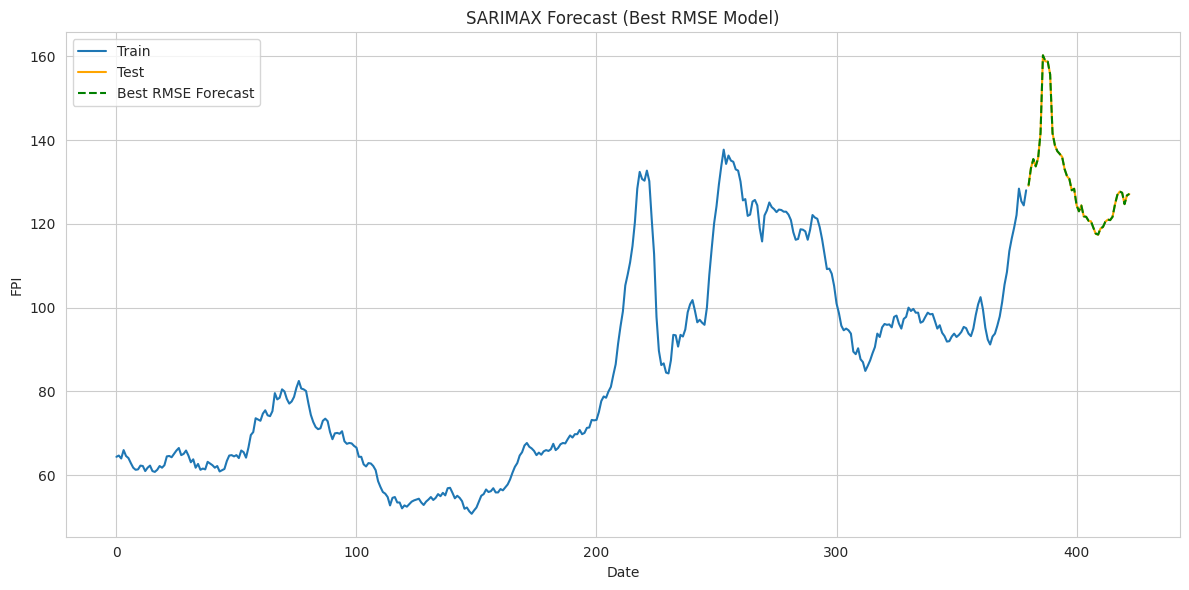

In [ ]:
import itertools
import random
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ==== Function to avoid lag conflicts ====
def has_conflicting_lags(order, seasonal_order, seasonal_period):
    p, d, q = order
    P, D, Q, s = seasonal_order

    # AR lags
    ar_lags = set(range(1, p + 1))
    seasonal_ar_lags = set(P * s for P in range(1, P + 1))

    # MA lags
    ma_lags = set(range(1, q + 1))
    seasonal_ma_lags = set(Q * s for Q in range(1, Q + 1))

    # Check for conflicts
    ar_conflict = ar_lags & seasonal_ar_lags
    ma_conflict = ma_lags & seasonal_ma_lags

    return bool(ar_conflict or ma_conflict)

# ==== Parameter space ====
p = q = range(0, 15)
d = [1]
s = 7  # seasonal cycle

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in pdq]

# ==== Filter valid combinations to avoid lag conflicts ====
valid_combinations = [
    (order, seasonal_order)
    for order, seasonal_order in itertools.product(pdq, seasonal_pdq)
    if not has_conflicting_lags(order, seasonal_order, s)
]

# ==== Random sample of 200 from valid combinations ====
random.seed(42)
sampled_combinations = random.sample(valid_combinations, 20)

# ==== Track best AIC and RMSE models ====
best_aic = float('inf')
best_aic_model = None
best_aic_order = None
best_aic_seasonal_order = None

best_rmse = float('inf')
best_rmse_model = None
best_rmse_order = None
best_rmse_seasonal_order = None

# ==== Run SARIMAX on 200 random combinations ====
for order, seasonal_order in sampled_combinations:
    try:
        model = SARIMAX(train_data['FPI'],
                        exog=exog_train,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        pred = results.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)
        rmse = math.sqrt(mean_squared_error(test_data['FPI'], pred))

        print(f"Trying SARIMAX{order}x{seasonal_order} - AIC: {results.aic:.2f}, RMSE: {rmse:.2f}")

        # Track best AIC
        if results.aic < best_aic:
            best_aic = results.aic
            best_aic_model = results
            best_aic_order = order
            best_aic_seasonal_order = seasonal_order

        # Track best RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_rmse_model = results
            best_rmse_order = order
            best_rmse_seasonal_order = seasonal_order

    except Exception as e:
        print(f"Error for SARIMAX{order}x{seasonal_order}: {e}")
        continue

# ==== Output best models ====
print("\n=======================")
print(f"Best AIC Model: SARIMAX{best_aic_order}x{best_aic_seasonal_order} - AIC: {best_aic:.2f}")
print(f"Best RMSE Model: SARIMAX{best_rmse_order}x{best_rmse_seasonal_order} - RMSE: {best_rmse:.2f}")
print("=======================\n")

# ==== Plot best RMSE forecast ====
pred = best_aic_model.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['FPI'], label='Train')
plt.plot(test_data.index, test_data['FPI'], label='Test', color='orange')
plt.plot(test_data.index, pred, label='Best RMSE Forecast', linestyle='--', color='green')
plt.title('SARIMAX Forecast (Best AIC Model)')
plt.xlabel('Date')
plt.ylabel('FPI')
plt.legend()
plt.tight_layout()
plt.show()

Best AIC Model: SARIMAX(6, 1, 1)x(5, 1, 6, 7) - AIC: -1247.63, RMSE: 0.03


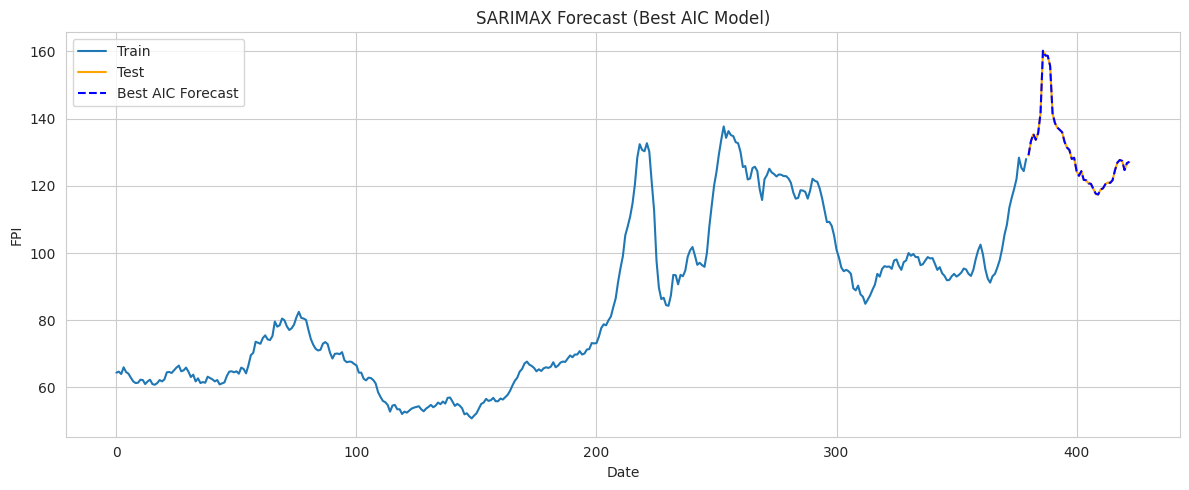

In [ ]:

import math
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# ==== Define the two best models ====
best_aic_order = (6, 1, 1)
best_aic_seasonal_order = (5, 1, 6, 7)


# ==== Fit Best AIC Model ====
model_aic = SARIMAX(train_data['FPI'],
                    exog=exog_train,
                    order=best_aic_order,
                    seasonal_order=best_aic_seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
results_aic = model_aic.fit(disp=False)
pred_aic = results_aic.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)
rmse_aic = math.sqrt(mean_squared_error(test_data['FPI'], pred_aic))



# ==== Print Model Info ====
print(f"Best AIC Model: SARIMAX{best_aic_order}x{best_aic_seasonal_order} - AIC: {results_aic.aic:.2f}, RMSE: {rmse_aic:.2f}")



# ==== Plot AIC Model ====
plt.figure(figsize=(12, 5))
plt.plot(train_data.index, train_data['FPI'], label='Train')
plt.plot(test_data.index, test_data['FPI'], label='Test', color='orange')
plt.plot(test_data.index, pred_aic, label='Best AIC Forecast', linestyle='--', color='blue')
plt.title('SARIMAX Forecast (Best AIC Model)')
plt.xlabel('Date')
plt.ylabel('FPI')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Plot actual and predicted test data only
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['FPI'], label='Test', color='orange')
plt.plot(test_data.index, pred_aic, label='Best AIC Forecast', linestyle='--', color='blue')
plt.title('SARIMAX Forecast (Best AIC Model)')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.legend()
plt.tight_layout()
plt.show()


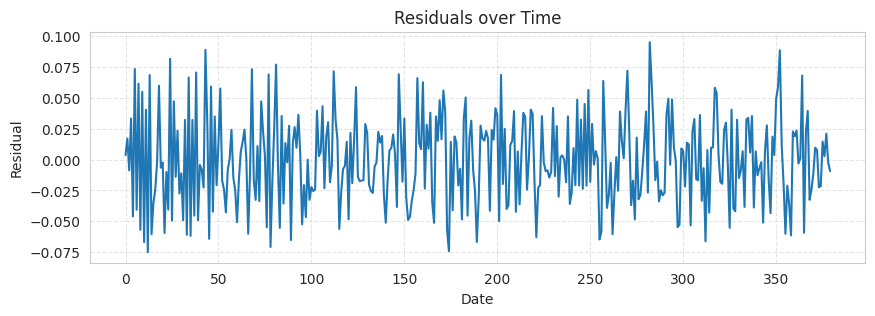

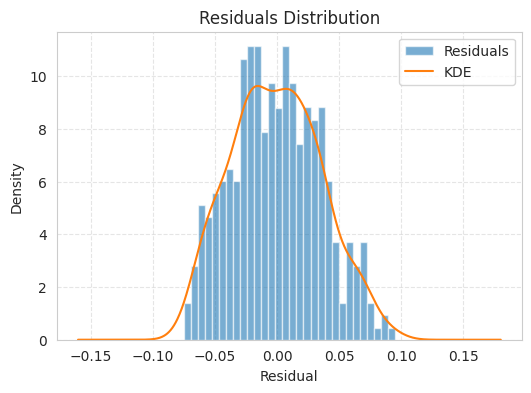

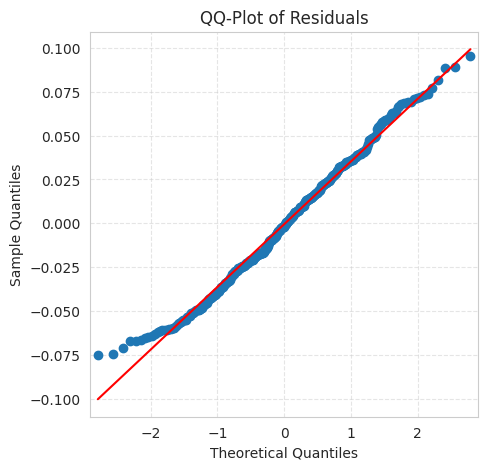

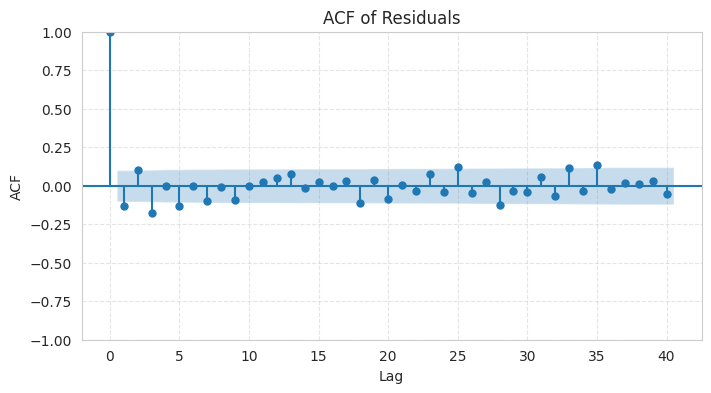

Ljung‑Box test results:
      lb_stat  lb_pvalue
10  36.612156   0.000066
20  49.562611   0.000256


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1. Extract residuals
resid = results_aic.resid.dropna()

# 2. Plot residuals over time
plt.figure(figsize=(10,3))
plt.plot(resid)
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3. Histogram + KDE of residuals
plt.figure(figsize=(6,4))
resid.plot(kind='hist', bins=30, density=True, alpha=0.6, label='Residuals')
resid.plot(kind='kde', label='KDE')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4. QQ‑plot for normality
plt.figure(figsize=(5,5))
qqplot(resid, line='s', ax=plt.gca())
plt.title('QQ‑Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 5. Autocorrelation Function (ACF) of residuals
plt.figure(figsize=(8,4))
plot_acf(resid, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 6. Ljung‑Box test for no remaining autocorrelation
#    we test at lags 10 and 20 (you can customize)
lb = acorr_ljungbox(resid, lags=[10, 20], return_df=True)
print("Ljung‑Box test results:")
print(lb)

# **LSTM , GRU & RNN  MODEL**

Training RNN...
Epoch [10/100], Loss: 0.0032, Test Loss: 0.0049
Epoch [20/100], Loss: 0.0012, Test Loss: 0.0032
Epoch [30/100], Loss: 0.0013, Test Loss: 0.0032
Epoch [40/100], Loss: 0.0019, Test Loss: 0.0029
Epoch [50/100], Loss: 0.0016, Test Loss: 0.0027
Epoch [60/100], Loss: 0.0005, Test Loss: 0.0028
Epoch [70/100], Loss: 0.0004, Test Loss: 0.0023
Epoch [80/100], Loss: 0.0009, Test Loss: 0.0022
Epoch [90/100], Loss: 0.0006, Test Loss: 0.0021
Epoch [100/100], Loss: 0.0008, Test Loss: 0.0023
Training GRU...
Epoch [10/100], Loss: 0.0033, Test Loss: 0.0060
Epoch [20/100], Loss: 0.0021, Test Loss: 0.0042
Epoch [30/100], Loss: 0.0017, Test Loss: 0.0035
Epoch [40/100], Loss: 0.0027, Test Loss: 0.0029
Epoch [50/100], Loss: 0.0005, Test Loss: 0.0034
Epoch [60/100], Loss: 0.0007, Test Loss: 0.0031
Epoch [70/100], Loss: 0.0012, Test Loss: 0.0026
Epoch [80/100], Loss: 0.0004, Test Loss: 0.0028
Epoch [90/100], Loss: 0.0004, Test Loss: 0.0028
Epoch [100/100], Loss: 0.0005, Test Loss: 0.0022
Traini

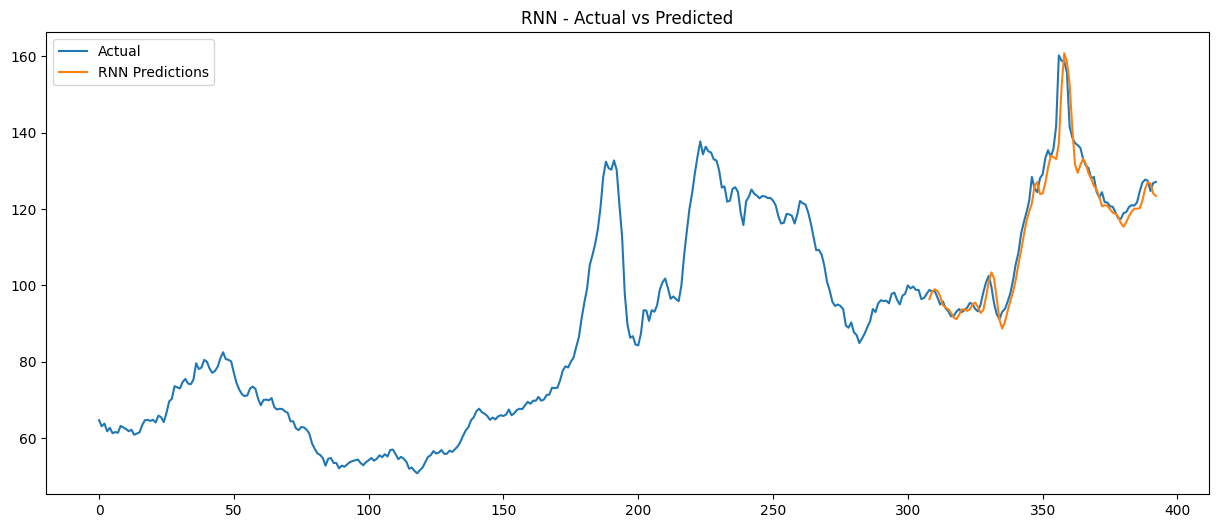

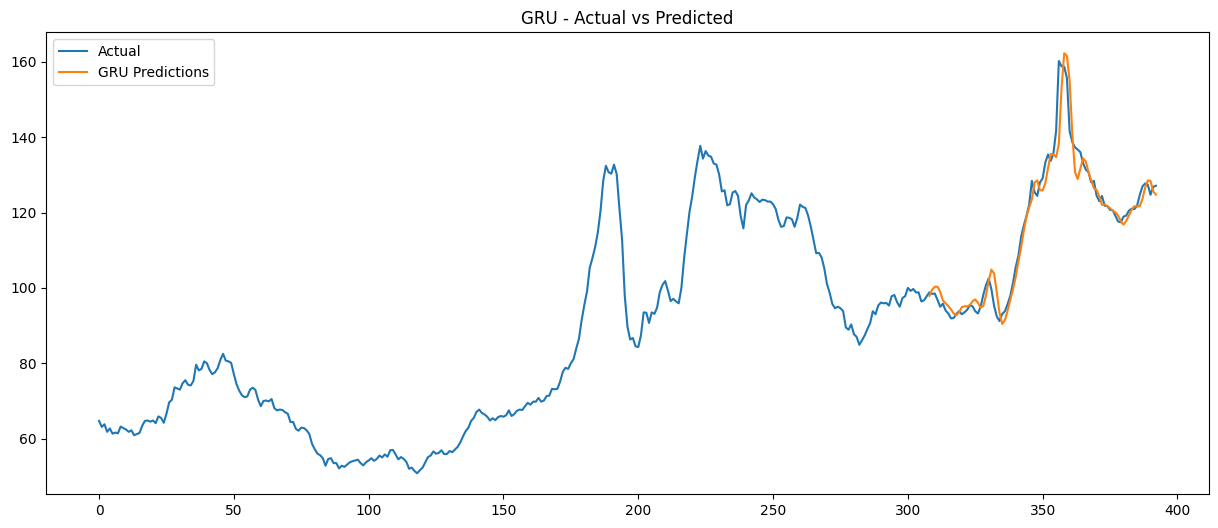

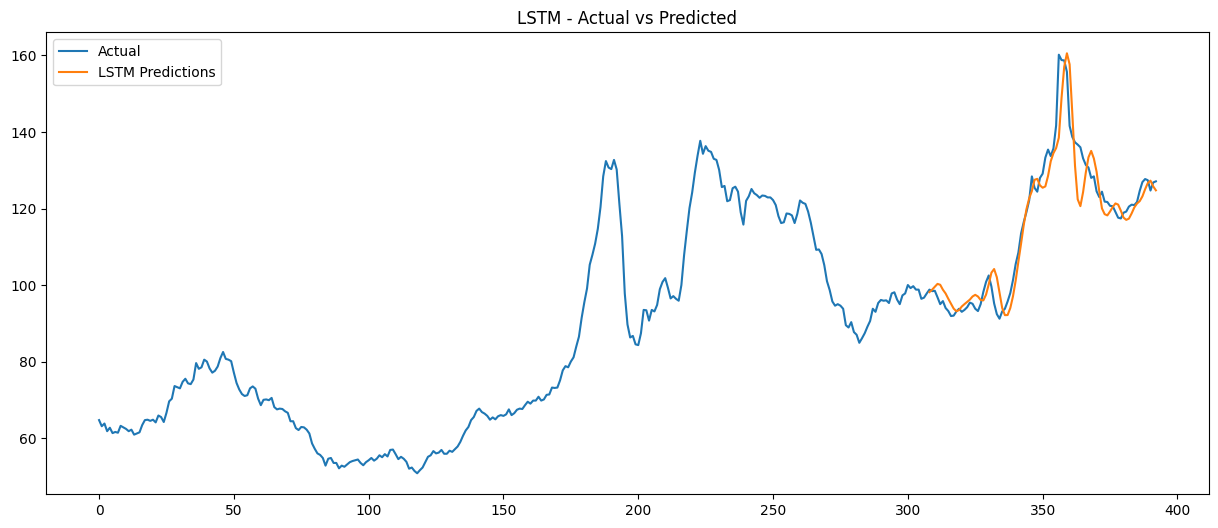

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# df = pd.read_csv("https://raw.githubusercontent.com/Krishil-Jayswal/AQI-Forecasting/refs/heads/main/2.%20Data%20Preprocessing/full_aqi_dataset.csv")

# Load your data
data = df_daily['FPI'].values.reshape(-1, 1)

# Hyperparameters
window_size = 30  # Use 30 days to predict next day
batch_size = 32
hidden_size = 50
num_epochs = 100
learning_rate = 0.001

# Preprocessing
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return torch.FloatTensor(np.array(X)), torch.FloatTensor(np.array(y))

# Split data into train/test
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create sequences (including overlapping between train and test)
test_sequences_input = np.concatenate([train_scaled[-window_size:], test_scaled])
X_train, y_train = create_sequences(train_scaled, window_size)
X_test, y_test = create_sequences(test_sequences_input, window_size)

# Create Dataset and DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model Definitions
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)  # out: (batch_size, seq_length, hidden_size)
        out = out[:, -1, :]    # Get last time step output
        out = self.fc(out)
        return out

class GRUModel(nn.Module):
    def __init__(self):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# Training Function
def train_model(model, model_name):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    print(f"Training {model_name}...")
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

        # Validation
        if (epoch+1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                test_preds = model(X_test)
                test_loss = criterion(test_preds, y_test)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    return model

# Initialize and train models
rnn_model = RNNModel()
gru_model = GRUModel()
lstm_model = LSTMModel()

rnn_model = train_model(rnn_model, "RNN")
gru_model = train_model(gru_model, "GRU")
lstm_model = train_model(lstm_model, "LSTM")

# Prediction and Visualization
def plot_predictions(model, model_name):
    model.eval()
    with torch.no_grad():
        train_preds = model(X_train).cpu().numpy()  # Move to CPU before converting to NumPy
        test_preds = model(X_test).cpu().numpy()  # Move to CPU before converting to NumPy

    # Inverse transform predictions
    train_preds = scaler.inverse_transform(train_preds)
    test_preds = scaler.inverse_transform(test_preds)
    actual = scaler.inverse_transform(np.concatenate([y_train.cpu().numpy(), y_test.cpu().numpy()])) # Move to CPU

    # Create timeline (adjusted)
    total_len = len(train_preds) + len(test_preds)
    plt.figure(figsize=(15, 6))
    plt.plot(range(total_len), actual, label='Actual')
    plt.plot(range(len(train_preds), total_len), test_preds, label=f'{model_name} Predictions')  # Adjusted plotting
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.legend()
    plt.show()

# Plot results
plot_predictions(rnn_model, "RNN")
plot_predictions(gru_model, "GRU")
plot_predictions(lstm_model, "LSTM")

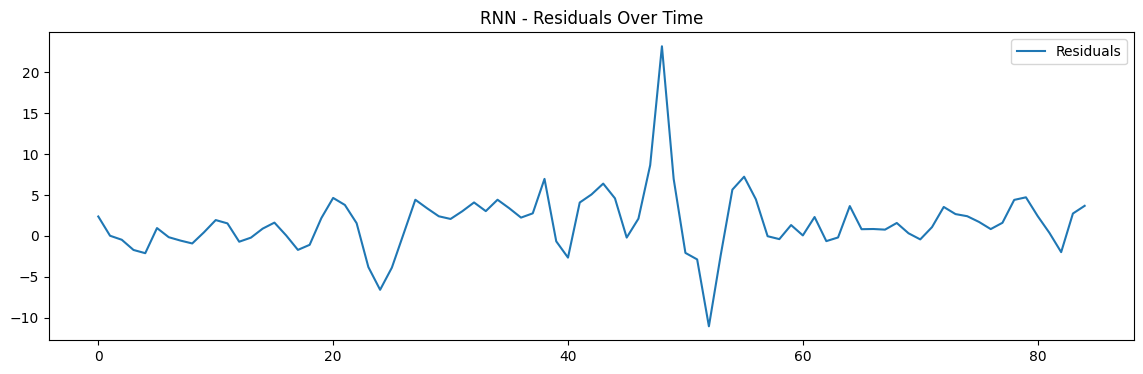

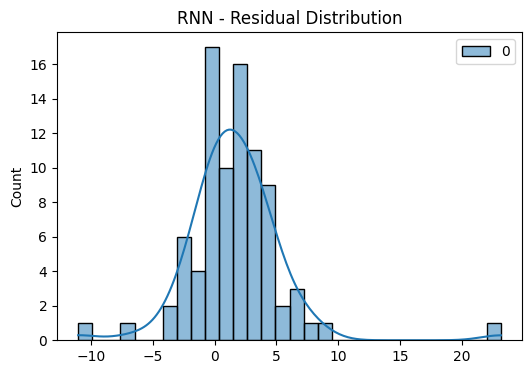

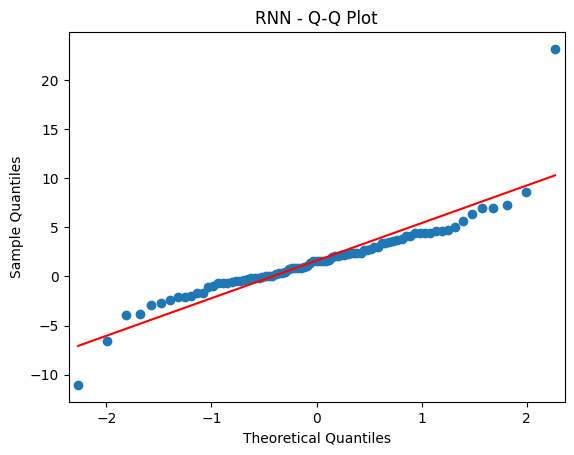

<Figure size 600x400 with 0 Axes>

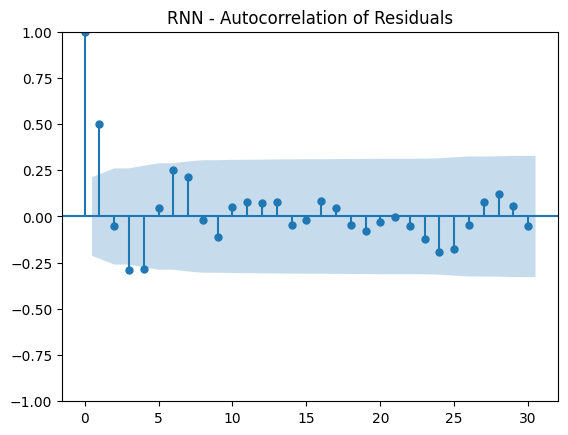

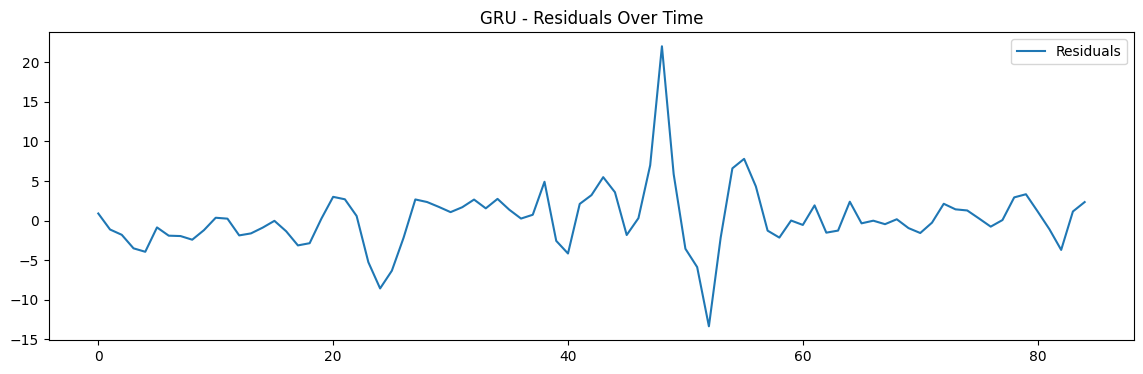

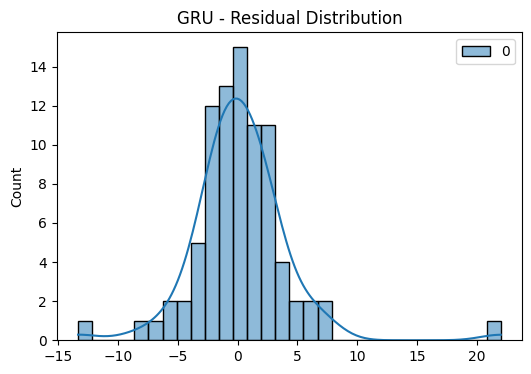

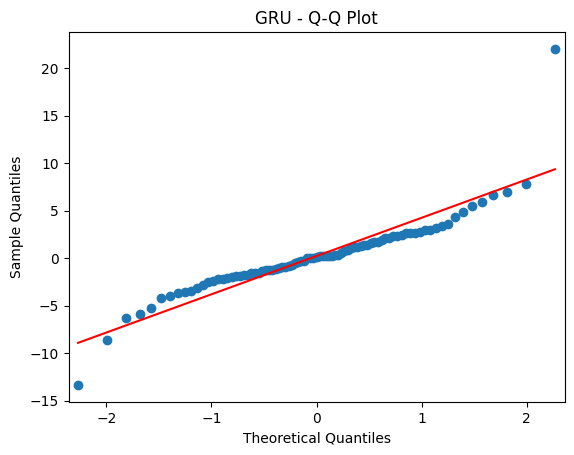

<Figure size 600x400 with 0 Axes>

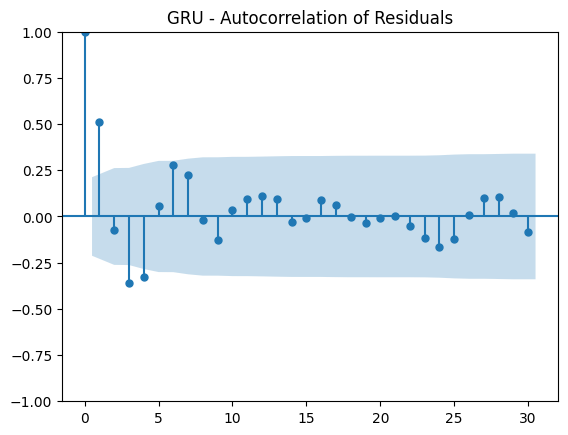

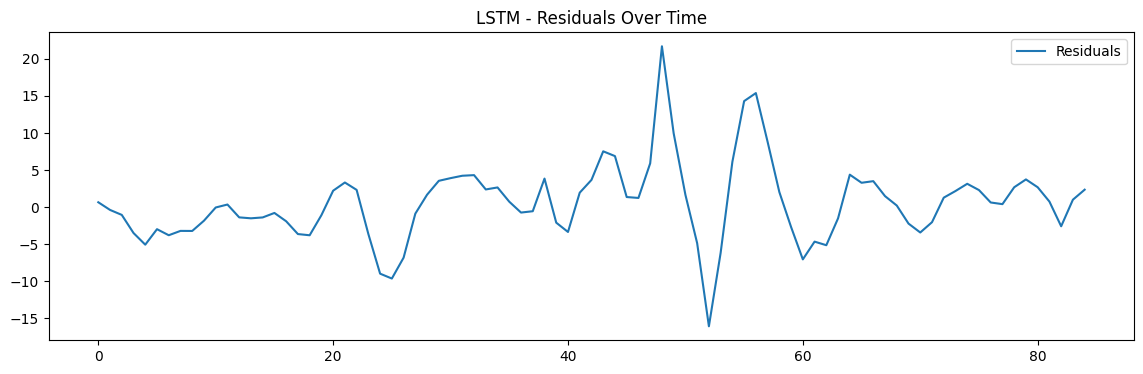

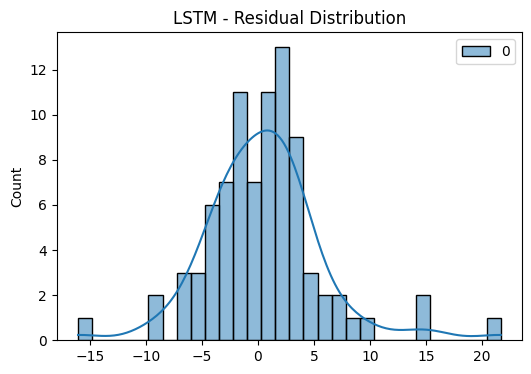

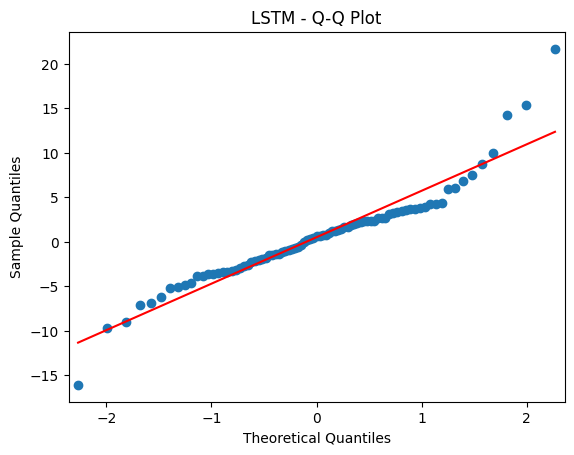

<Figure size 600x400 with 0 Axes>

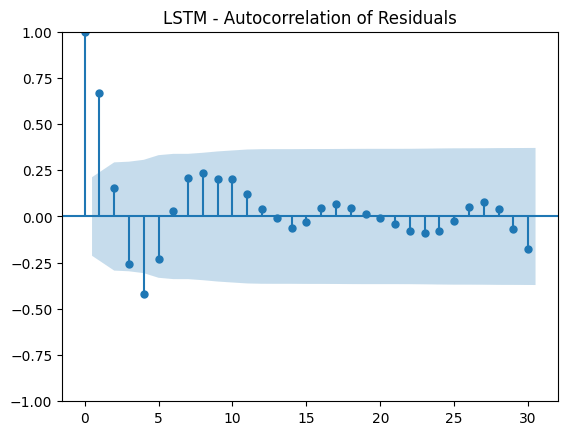

In [ ]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

def residual_analysis(model, model_name):
    model.eval()
    with torch.no_grad():
        preds = model(X_test).cpu().numpy()

    preds_inverse = scaler.inverse_transform(preds)
    actual_inverse = scaler.inverse_transform(y_test.cpu().numpy())
    residuals = actual_inverse - preds_inverse

    # Plot residuals over time
    plt.figure(figsize=(14, 4))
    plt.plot(residuals, label='Residuals')
    plt.title(f'{model_name} - Residuals Over Time')
    plt.legend()
    plt.show()

    # Histogram / KDE plot
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'{model_name} - Residual Distribution')
    plt.show()

    # QQ plot
    sm.qqplot(residuals.flatten(), line='s')
    plt.title(f'{model_name} - Q-Q Plot')
    plt.show()

    # ACF plot
    plt.figure(figsize=(6, 4))
    plot_acf(residuals.flatten(), lags=30)
    plt.title(f'{model_name} - Autocorrelation of Residuals')
    plt.show()

# Run residual analysis
residual_analysis(rnn_model, "RNN")
residual_analysis(gru_model, "GRU")
residual_analysis(lstm_model, "LSTM")


In [ ]:
def plot_test_predictions(model, model_name):
    model.eval()
    with torch.no_grad():
        test_preds = model(X_test).cpu().numpy()

    # Inverse transform predictions and actuals
    test_preds = scaler.inverse_transform(test_preds)
    actual_test = scaler.inverse_transform(y_test.cpu().numpy())

    # Plot only test portion (ignore train for now)
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(X_train), len(X_train) + len(actual_test)), actual_test, label='Actual Test Data', color='orange')
    plt.plot(range(len(X_train), len(X_train) + len(test_preds)), test_preds, label='Predicted Test Data', color='blue')
    plt.title(f'Actual vs Predicted ({model_name})')
    plt.xlabel('Time')
    plt.ylabel('FPI Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


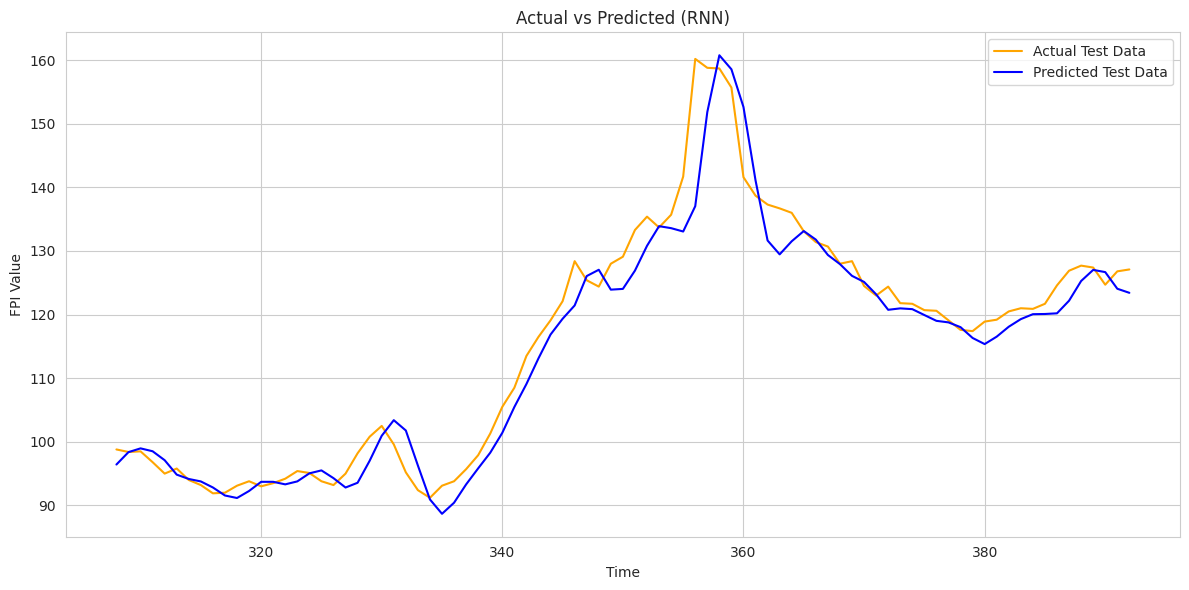

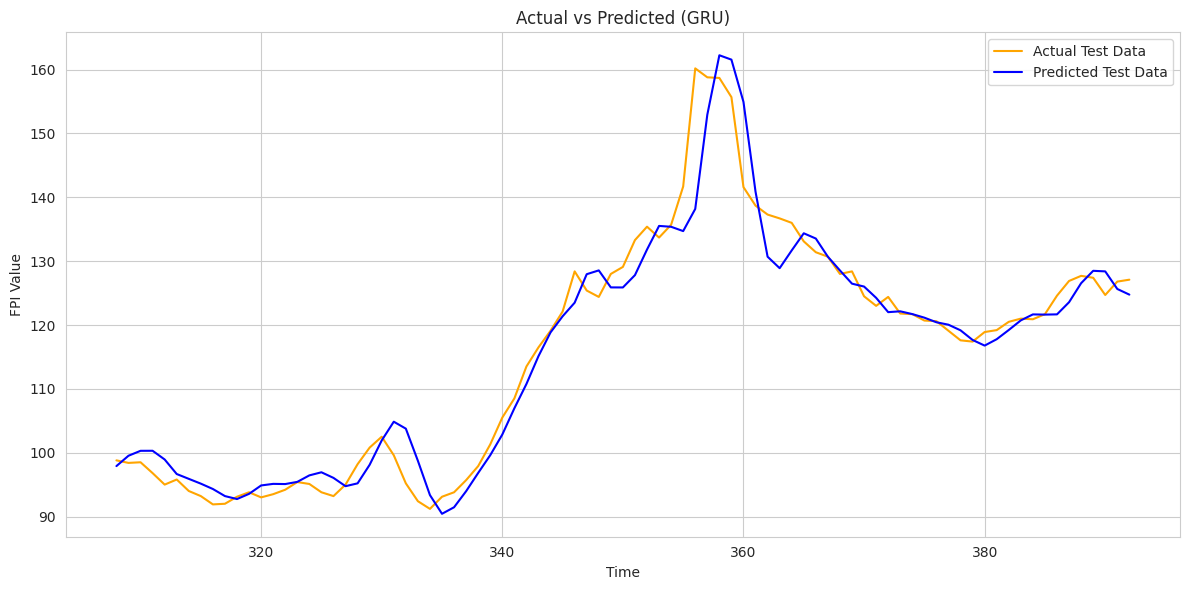

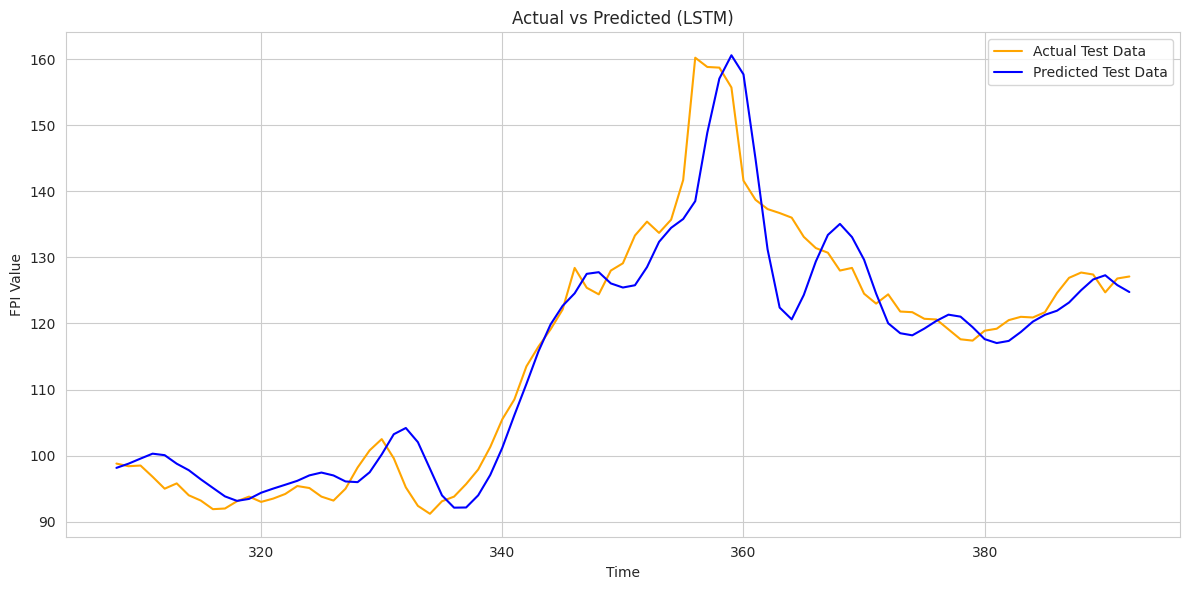

In [ ]:
plot_test_predictions(rnn_model, "RNN")
plot_test_predictions(gru_model, "GRU")
plot_test_predictions(lstm_model, "LSTM")
